In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\chd78002\\OneDrive - Groupe IPSEN\\Documents\\GIT-PROJECTS\\Exam_Datagong_Doliveux\\notebooks'

In [4]:
import pandas as pd

In [5]:
#Import du fichier
df=pd.read_csv("../data/thelook_fr_women_2023_2024.csv")

In [6]:
# Affichez les dimensions du DataFrame
print(f"La base fait {df.shape[0]} lignes et {df.shape[1]} colonnes")

La base fait 1679 lignes et 20 colonnes


# PARTIE 1 : ANALYSE DU DATAFRAME, CONTROLE QUALITE, FORMATTAGE DES DATES, COHERENCES DES DONNEES"

In [7]:
# Affichez les 5 premières lignes
df.head()


,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
0,19425,28112,6983,2023-01-01 06:18:03+00:00,Shipped,29.500000,16.048000,Shorts,Women,Fox,Fox Juniors Momentum Short,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
1,19425,28113,10597,2023-01-01 06:44:58+00:00,Shipped,20.000000,10.000000,Intimates,Women,Wacoal,Wacoal Women's B-Smooth Bralette,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
2,4710,6730,11792,2023-01-03 04:44:50+00:00,Complete,38.000000,18.468000,Intimates,Women,American Apparel,American Apparel Striped Chiffon Tank,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris
3,16618,24006,329,2023-01-03 15:13:39+00:00,Complete,27.990000,16.402140,Tops & Tees,Women,Tri-Mountain,Tri-Mountain Women's 3/4-Sleeve Pique Knit Pol...,Complete,2023-01-03 18:58:00+00:00,2023-01-05 13:23:00+00:00,2023-01-09 10:25:00+00:00,13422,F,France,Hauts-de-France,Comines
4,4710,6731,5295,2023-01-05 06:43:09+00:00,Complete,56.880001,29.577601,Pants & Capris,Women,Lauren by Ralph Lauren,Lauren Ralph Lauren Velour Pants,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris


In [8]:
# Utilisation de la méthode info pour afficher les caracteristiques principales du DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1679 non-null   int64  
 1   order_item_id     1679 non-null   int64  
 2   product_id        1679 non-null   int64  
 3   item_created_at   1679 non-null   object 
 4   item_status       1679 non-null   object 
 5   sale_price        1679 non-null   float64
 6   cost              1679 non-null   float64
 7   category          1679 non-null   object 
 8   department        1679 non-null   object 
 9   brand             1677 non-null   object 
 10  product_name      1679 non-null   object 
 11  order_status      1679 non-null   object 
 12  order_created_at  1679 non-null   object 
 13  shipped_at        1133 non-null   object 
 14  delivered_at      636 non-null    object 
 15  user_id           1679 non-null   int64  
 16  gender            1679 non-null   object 


In [9]:
# Compte le nombre de lignes intégralement dupliquées
print(f"Il y a {df.duplicated(keep=False).sum()} lignes intégralement dupliquées")

# Affiche les observations intégralement dupliquées
df[df.duplicated(keep=False)]

Il y a 0 lignes intégralement dupliquées


,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city


In [10]:
#Vérifions qu'il n'y a pas de données négatives ou aberrrantes grace au min/max (en particulier pour cost & sale_price)
df.describe()

,order_id,order_item_id,product_id,sale_price,cost,user_id
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,60851.683740,88372.698035,7922.506254,57.021769,27.460066,48702.836212
std,35655.502994,51820.578196,4680.553838,69.682245,31.854450,28441.847629
min,359.000000,517.000000,12.000000,1.820000,0.749840,279.000000
25%,30357.000000,44069.500000,3812.000000,19.990000,9.681000,24349.000000
50%,60827.000000,88353.000000,7907.000000,38.000000,18.230800,48715.000000
75%,90911.000000,132106.000000,12053.000000,68.000000,33.232345,72541.000000
max,124791.000000,181230.000000,15982.000000,903.000000,437.052001,99717.000000


In [11]:
# Verifions qu'il n'y a pas d'incohérence entre les product_id et les category (un product_id ne doit être affecté qu'à une seule category)
category_counts = df.groupby('product_id')['category'].nunique() #  compter le nombre de catégories uniques par product_id
product_ids_multiple_categories = category_counts[category_counts > 1].index # sélectionner les product_id avec plus d'une catégorie

df_pb_cat_pdct = df[df['product_id'].isin(product_ids_multiple_categories)]  
print(df_pb_cat_pdct) # si vide affiché -> pas de probleme

Empty DataFrame
Columns: [order_id, order_item_id, product_id, item_created_at, item_status, sale_price, cost, category, department, brand, product_name, order_status, order_created_at, shipped_at, delivered_at, user_id, gender, country, state, city]
Index: []


In [12]:
# Verifions qu'il n'y a pas d'incohérence entre les product_id et les prix de vente (un product_id ne doit être affecté qu'à une seul sale_price)
price_counts = df.groupby('product_id')['sale_price'].nunique() #  compter le nombre de prix uniques par product_id
product_ids_multiple_prices =price_counts[price_counts > 1].index # sélectionner les product_id avec plus d'un sale_price

df_pb_price_pdct = df[df['product_id'].isin(product_ids_multiple_prices)] 
print(df_pb_price_pdct) # si vide -> pas de probleme

Empty DataFrame
Columns: [order_id, order_item_id, product_id, item_created_at, item_status, sale_price, cost, category, department, brand, product_name, order_status, order_created_at, shipped_at, delivered_at, user_id, gender, country, state, city]
Index: []


In [13]:
# Verifions qu'il n'y a pas d'incohérence entre les product_id et les couts (un product_id ne doit être affecté qu'à une seul cost)
cost_counts = df.groupby('product_id')['cost'].nunique() #  compter le nombre de prix uniques par product_id
product_ids_multiple_cost =cost_counts[cost_counts > 1].index # sélectionner les product_id avec plus d'un cost

df_pb_cost_pdct = df[df['product_id'].isin(product_ids_multiple_cost)] 
print(df_pb_cost_pdct) # si vide -> pas de probleme

Empty DataFrame
Columns: [order_id, order_item_id, product_id, item_created_at, item_status, sale_price, cost, category, department, brand, product_name, order_status, order_created_at, shipped_at, delivered_at, user_id, gender, country, state, city]
Index: []


In [14]:
# Création d'un mini dictionnaire de données : définition, type, exemple):


definitions = {
    "order_id": "référence (ID) de la commande",
    "order_item_id": "référence (ID) de l'article inclus dans la commande",
    "product_id": "référence de l'article (au sens catalogue) - sans lien avec la commande",
    "item_created_at": "date de création de l'article ",
    "item_status": "statut de l'article commmandé",
    "sale_price": "prix de vente de l'article",
    "cost": "coût de l'article",
    "category": "catégorie de l'article",
    "department": "département de l'article / de sa catégorie",
    "brand": "marque de l'article",
    "product_name":"nom de l'article",
    "order_status": "statut de la commande",
    "order_created_at":"date de création de la commande",
    "shipped_at": "date d'expédition",
    "delivered_at": "date de livraison",
    "user_id":"identifiant du client",
    "gender":"genre du client",
    "country": "pays de la livraison",
    "state":"région de la livraison",
    "city":"ville de la livraion"
}

mini_dict = []
for col in df.columns:
    col_info = {
        "colonne": col,
        "definition": definitions.get(col, "Définition à compléter"),
        "type": str(df[col].dtype),
        "exemple": df[col].dropna().iloc[0]
    }
    mini_dict.append(col_info)
mini_dict

[{'colonne': 'order_id',
  'definition': 'référence (ID) de la commande',
  'type': 'int64',
  'exemple': np.int64(19425)},
 {'colonne': 'order_item_id',
  'definition': "référence (ID) de l'article inclus dans la commande",
  'type': 'int64',
  'exemple': np.int64(28112)},
 {'colonne': 'product_id',
  'definition': "référence de l'article (au sens catalogue) - sans lien avec la commande",
  'type': 'int64',
  'exemple': np.int64(6983)},
 {'colonne': 'item_created_at',
  'definition': "date de création de l'article ",
  'type': 'object',
  'exemple': '2023-01-01 06:18:03+00:00'},
 {'colonne': 'item_status',
  'definition': "statut de l'article commmandé",
  'type': 'object',
  'exemple': 'Shipped'},
 {'colonne': 'sale_price',
  'definition': "prix de vente de l'article",
  'type': 'float64',
  'exemple': np.float64(29.5)},
 {'colonne': 'cost',
  'definition': "coût de l'article",
  'type': 'float64',
  'exemple': np.float64(16.047999992966652)},
 {'colonne': 'category',
  'definition':

## Analyse et identification des prochaines étapes à mettre en place :
### Pas de lignes dupliquées -> pas d'action
### 1. La colonnes Brand a deux valeurs manquantes. Nous allons les remplacer.
### 2. Format des objets : les données item_created_at, order_created_at, shipped_at, delivered_at devraient être des dates. Nous allons les convertir.
### 3. Les colonnes shipped_at et delivered_at ont des valeurs manquantes. Nous allons vérifier si c'est normal ou non.
### 4. Nous vérifierons si les bornes temporelles sont cohérentes

### 1. TRAITEMENT DES VALEURS MANQUANTES DANS BRAND

In [15]:
lignes_null_brand = df[df['brand'].isna()]
df_check = df[df['product_id'].isin(lignes_null_brand)]
# si le DataFrame est vide -> pas de correspondance avec d'autres lignes (product_id isolé), sinon on affiche les valeurs
if df_check[['product_id', 'brand']].empty:
    print("Pas de correspondance avec d'autres lignes (product_id isolée).")
else:
    print(df_check[['product_id', 'brand']])

pd.set_option('display.max_colwidth', None) # permet d'afficher toute la colonne (code ci-dessous) sans troncature
print(lignes_null_brand["product_name"]) # affiche les product name des lignes avec brand null
print(sorted(df["brand"].dropna().unique()))# on regarde toutes les brands existantes pour voir si on trouve qqch de cohérent / on classe par ordre alphabétique pour plus de lisibilité

#En comparant les product_name & brand_name, on reconnaît une valeur que l'on peut remplacer ('Out Of Print'). On va remplacer la valeur manquanate dans le dataframe")
df.loc[df['product_name'].str.contains('Out Of Print', na=False) & df['brand'].isna(), 'brand'] = 'Out Of Print'

Pas de correspondance avec d'autres lignes (product_id isolée).
320     The Very Hungry Caterpillar Classic Book Women's Slim Fit T-shirt by Out Of Print Clothing
1237                                                                 Husky Animal Hat with Mittens
Name: product_name, dtype: object
['!it Jeans', "'47 Brand", '180s', '2XU', '2b by bebe', '5 Seasons', '525 America', '7 For All Mankind', 'A Pea in the Pod', 'A. Byer', 'A:X Armani Exchange', 'ADAR UNIFORMS', 'AG Adriano Goldschmied', 'AGB', 'AJs', 'AN1225', 'ASICS', 'Active Products', 'Activewear Apparel', 'Adriana', 'Adrianna Papell', 'Aegean', 'Affinitas Intimates', 'Alan Sloane', 'Alexander Del Rossa', 'Alfred Dunner', 'Alice & Trixie', "Alki'i", 'Allegra K', 'Allen Allen', 'Alternative', 'AmeriBag', 'American Apparel', 'Ames', 'Amnesty International', 'Anemone', 'Angelina', 'Angelina Hosiery', 'AnimalShirtsUSA', 'Anita', 'Anna-Kaci', 'Anne Klein', 'Anvil', 'Apt 9', 'Aqua', "Arc'teryx", 'Arianne', 'Artex', 'Artwedding', 'As

In [16]:
# Pour l'autre ligne avec brand N/A, on remplace par "missing"

df['brand'] = df['brand'].fillna('Missing') 

df.isna().sum() # on vérifie qu'on n'a plus de valeurs manquantes pour brand

order_id               0
order_item_id          0
product_id             0
item_created_at        0
item_status            0
sale_price             0
cost                   0
category               0
department             0
brand                  0
product_name           0
order_status           0
order_created_at       0
shipped_at           546
delivered_at        1043
user_id                0
gender                 0
country                0
state                  0
city                   0
dtype: int64

### 2.CONVERSION DES DATES AU BON FORMAT : "item_created_at', "order_created_at", "shipped_at", "delivered_at"

In [17]:

# on se remet sur la racine du projet pour pouvoir aller chercher la fonction convert_dates définie dans le script
os.chdir("..")
print(os.getcwd())

c:\Users\chd78002\OneDrive - Groupe IPSEN\Documents\GIT-PROJECTS\Exam_Datagong_Doliveux


In [18]:
# on appelle la fonction convert_dates définie dans utils.py pour convertir les colonnes "item_created_at', "order_created_at", "shipped_at", "delivered_at" au format date
from src.utils import convert_dates


df = convert_dates(df)
df.head()

,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
0,19425,28112,6983,2023-01-01 06:18:03+00:00,Shipped,29.500000,16.048000,Shorts,Women,Fox,Fox Juniors Momentum Short,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaT,15644,F,France,Centre-Val de Loire,Corquilleroy
1,19425,28113,10597,2023-01-01 06:44:58+00:00,Shipped,20.000000,10.000000,Intimates,Women,Wacoal,Wacoal Women's B-Smooth Bralette,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaT,15644,F,France,Centre-Val de Loire,Corquilleroy
2,4710,6730,11792,2023-01-03 04:44:50+00:00,Complete,38.000000,18.468000,Intimates,Women,American Apparel,American Apparel Striped Chiffon Tank,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris
3,16618,24006,329,2023-01-03 15:13:39+00:00,Complete,27.990000,16.402140,Tops & Tees,Women,Tri-Mountain,Tri-Mountain Women's 3/4-Sleeve Pique Knit Polo Shirt. 601,Complete,2023-01-03 18:58:00+00:00,2023-01-05 13:23:00+00:00,2023-01-09 10:25:00+00:00,13422,F,France,Hauts-de-France,Comines
4,4710,6731,5295,2023-01-05 06:43:09+00:00,Complete,56.880001,29.577601,Pants & Capris,Women,Lauren by Ralph Lauren,Lauren Ralph Lauren Velour Pants,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris


### 3. TRAITEMENT DES N/A pour "shipped at" et "delivered at"

#### Je vois dans la méthode info qu'il y a des valeurs manquantes pour "shipped at" et "delivered at". 
#### Les valeurs "shipped_at" et "delivered_at" doivent être cohérentes avec le "order_status"
#### Je veux d'abord vérifier que les valeurs manquantes ne concernent que les commandes qui n'ont pas un statut "Complete"


In [19]:
#Vérification des valeurs de "order_status"
print(f"Les valeurs de order_status sont {df["order_status"].unique()}")
print("\n")
print("On peut estimer qu'on classe les statuts comme suit :",
"0. Cancelled → La commande a été annulée avant expédition.",
"1. Processing → La commande est en cours, rien n’a encore été expédié",
"2. Shipped → La commande a été expédiée, mais pas encore terminée",
"3. Complete → La commande a été livrée, tout est terminé",
"4. Returned → La commande a été renvoyée, donc elle est aussi terminée. On considère que la vente est annulée", sep="\n")
print("\n")

#Pour les NaT de "shipped at" et "delivered at", quel est le order_status associé?

#Filtrer les lignes où 'shipped_at' est NaT
NaT_shipped=df[df["shipped_at"].isna()]
# Afficher les valeurs de la colonne 'order_status' pour ces lignes
print(f"Les dates d'expéditions inexistantes (valeurs NaT de shipped_at) sont associées aux statuts de commandes suivants ('order_status'):{NaT_shipped['order_status'].unique()}")
print("\n")


#Filtrer les lignes où 'delivered_at' est NaT
NaT_delivered=df[df["delivered_at"].isna()]
# Afficher les valeurs de la colonne 'order_status' pour ces lignes
print(f"Les dates de livraison inexistantes (valeurs NaT de delivered_at) sont associées aux statuts de commandes suivants ('order_status'):{NaT_delivered['order_status'].unique()}")
print("\n")
print("Conclusion : Les valeurs manquantes sont cohérentes avec le statut de la commande associé.")


Les valeurs de order_status sont ['Shipped' 'Complete' 'Processing' 'Returned' 'Cancelled']


On peut estimer qu'on classe les statuts comme suit :
0. Cancelled → La commande a été annulée avant expédition.
1. Processing → La commande est en cours, rien n’a encore été expédié
2. Shipped → La commande a été expédiée, mais pas encore terminée
3. Complete → La commande a été livrée, tout est terminé
4. Returned → La commande a été renvoyée, donc elle est aussi terminée. On considère que la vente est annulée


Les dates d'expéditions inexistantes (valeurs NaT de shipped_at) sont associées aux statuts de commandes suivants ('order_status'):['Processing' 'Cancelled']


Les dates de livraison inexistantes (valeurs NaT de delivered_at) sont associées aux statuts de commandes suivants ('order_status'):['Shipped' 'Processing' 'Cancelled']


Conclusion : Les valeurs manquantes sont cohérentes avec le statut de la commande associé.


### 4. VERIFIONS SI LES BORNES TEMPORELLES SONT COHERENTES

In [20]:
#Isolons les colonnes avec les dates :
date_cols= df[['item_created_at', 'order_created_at', 'shipped_at',"delivered_at"]]

#affichons le min/max pour chacune :
for col in date_cols:
    # dropna() enlève les NaT pour ce calcul
    min_date = df[col].dropna().min()
    max_date = df[col].dropna().max()
    
    print(f"Colonne '{col}':")
    print("  Min :", min_date)
    print("  Max :", max_date)
    print()

print("Les minimums sont toujours inférieurs aux maximums, et les dates restent réalistes (pas de dates futures ni très anciennes). De plus, les dates sont cohérentes entre statuts (exemple : maximum de  delivered at plus grand que tous els autres maximums)")

Colonne 'item_created_at':
  Min : 2023-01-01 06:18:03+00:00
  Max : 2024-12-31 10:40:48+00:00

Colonne 'order_created_at':
  Min : 2022-12-29 10:00:00+00:00
  Max : 2024-12-31 05:13:00+00:00

Colonne 'shipped_at':
  Min : 2022-12-30 11:29:00+00:00
  Max : 2025-01-02 02:26:00+00:00

Colonne 'delivered_at':
  Min : 2023-01-04 03:03:00+00:00
  Max : 2025-01-02 13:06:00+00:00

Les minimums sont toujours inférieurs aux maximums, et les dates restent réalistes (pas de dates futures ni très anciennes). De plus, les dates sont cohérentes entre statuts (exemple : maximum de  delivered at plus grand que tous els autres maximums)


In [21]:
# Verification de la cohérence des dates
pb_shipped=df[df["shipped_at"]<df["order_created_at"]]
print(pb_shipped)


pb_order_item=df[df["item_created_at"]<df["order_created_at"]]
print(pb_order_item[["item_created_at", "order_created_at"]].assign(
    item_created_at = pb_order_item["item_created_at"].dt.strftime('%Y-%m-%d'),
    order_created_at = pb_order_item["order_created_at"].dt.strftime('%Y-%m-%d')
))
# on a ajouté .dt.strftime pour un affichage plus lisible



Empty DataFrame
Columns: [order_id, order_item_id, product_id, item_created_at, item_status, sale_price, cost, category, department, brand, product_name, order_status, order_created_at, shipped_at, delivered_at, user_id, gender, country, state, city]
Index: []
     item_created_at order_created_at
2         2023-01-03       2023-01-03
3         2023-01-03       2023-01-03
5         2023-01-06       2023-01-06
6         2023-01-08       2023-01-08
7         2023-01-13       2023-01-13
...              ...              ...
1667      2024-12-28       2024-12-28
1669      2024-12-29       2024-12-29
1671      2024-12-30       2024-12-30
1674      2024-12-31       2024-12-31
1675      2024-12-31       2024-12-31

[904 rows x 2 columns]


In [22]:
# Vérifions si le item_status peut avoir une valeur différente de son "order_status" associé. On voit que ce n'est pas le cas (cohérence OK) :
df.groupby('item_status')['order_status'].unique().reset_index()

,item_status,order_status
0,Cancelled,[Cancelled]
1,Complete,[Complete]
2,Processing,[Processing]
3,Returned,[Returned]
4,Shipped,[Shipped]


# PARTIE 2 : EXPLORATION DESCRIPTIVE : Explorations descriptives : distributions (prix de vente, coût), contribution par marque, catégorie,ville, saisonnalité mensuelle, et comparaison 2024 vs 2023"

## HYPOTHESE PRINCIPALES:
#### Compte tenu de la PARTIE 1, nous prendrons comme hypothèses que:
#### - Le Chiffre d'Affaires se calcule sur les ventes avec un statut Complete, sauf si explicitement mentionné autrement
#### - Pour classer les ventes par mois / année, nous prendrons en compte la date created_at.
#### - L'objectif est de créer une page de graphiques pour la vue d'ensemble + une page de graphiques par dimension. Les graphiques seront sélectionnés de façon pertinente selon chaque dimension.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.cm as cm #permet d'obtenir une palette de couleurs distinctes (pas de couleur doublonnée dans un graphique)

In [24]:
# Importons toutes les fonctions kpi depuis utils.py
from src.utils import kpi_CA
from src.utils import kpi_Margin
from src.utils import kpi_panier_moyen
from src.utils import kpi_tx_retour
from src.utils import kpi_tx_reachat
from src.utils import currency

In [25]:
# Création des années et mois dans df pour pouvoir créer les graphiques appropriés. 
df["year_created"]=df["item_created_at"].dt.year.astype('Int64')
df["month_created"]=df["item_created_at"].dt.month.astype('Int64')
df["year_month"]=df["item_created_at"].dt.to_period('M').astype(str)

#creation du df df_complete qui filtre sur les commandes livrées / non renvoyées
df_complete=df[df['order_status'] == "Complete"]


C:\Users\chd78002\AppData\Local\Temp\ipykernel_23608\593611976.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"]=df["item_created_at"].dt.to_period('M').astype(str)


### VUE D'ENSEMBLE


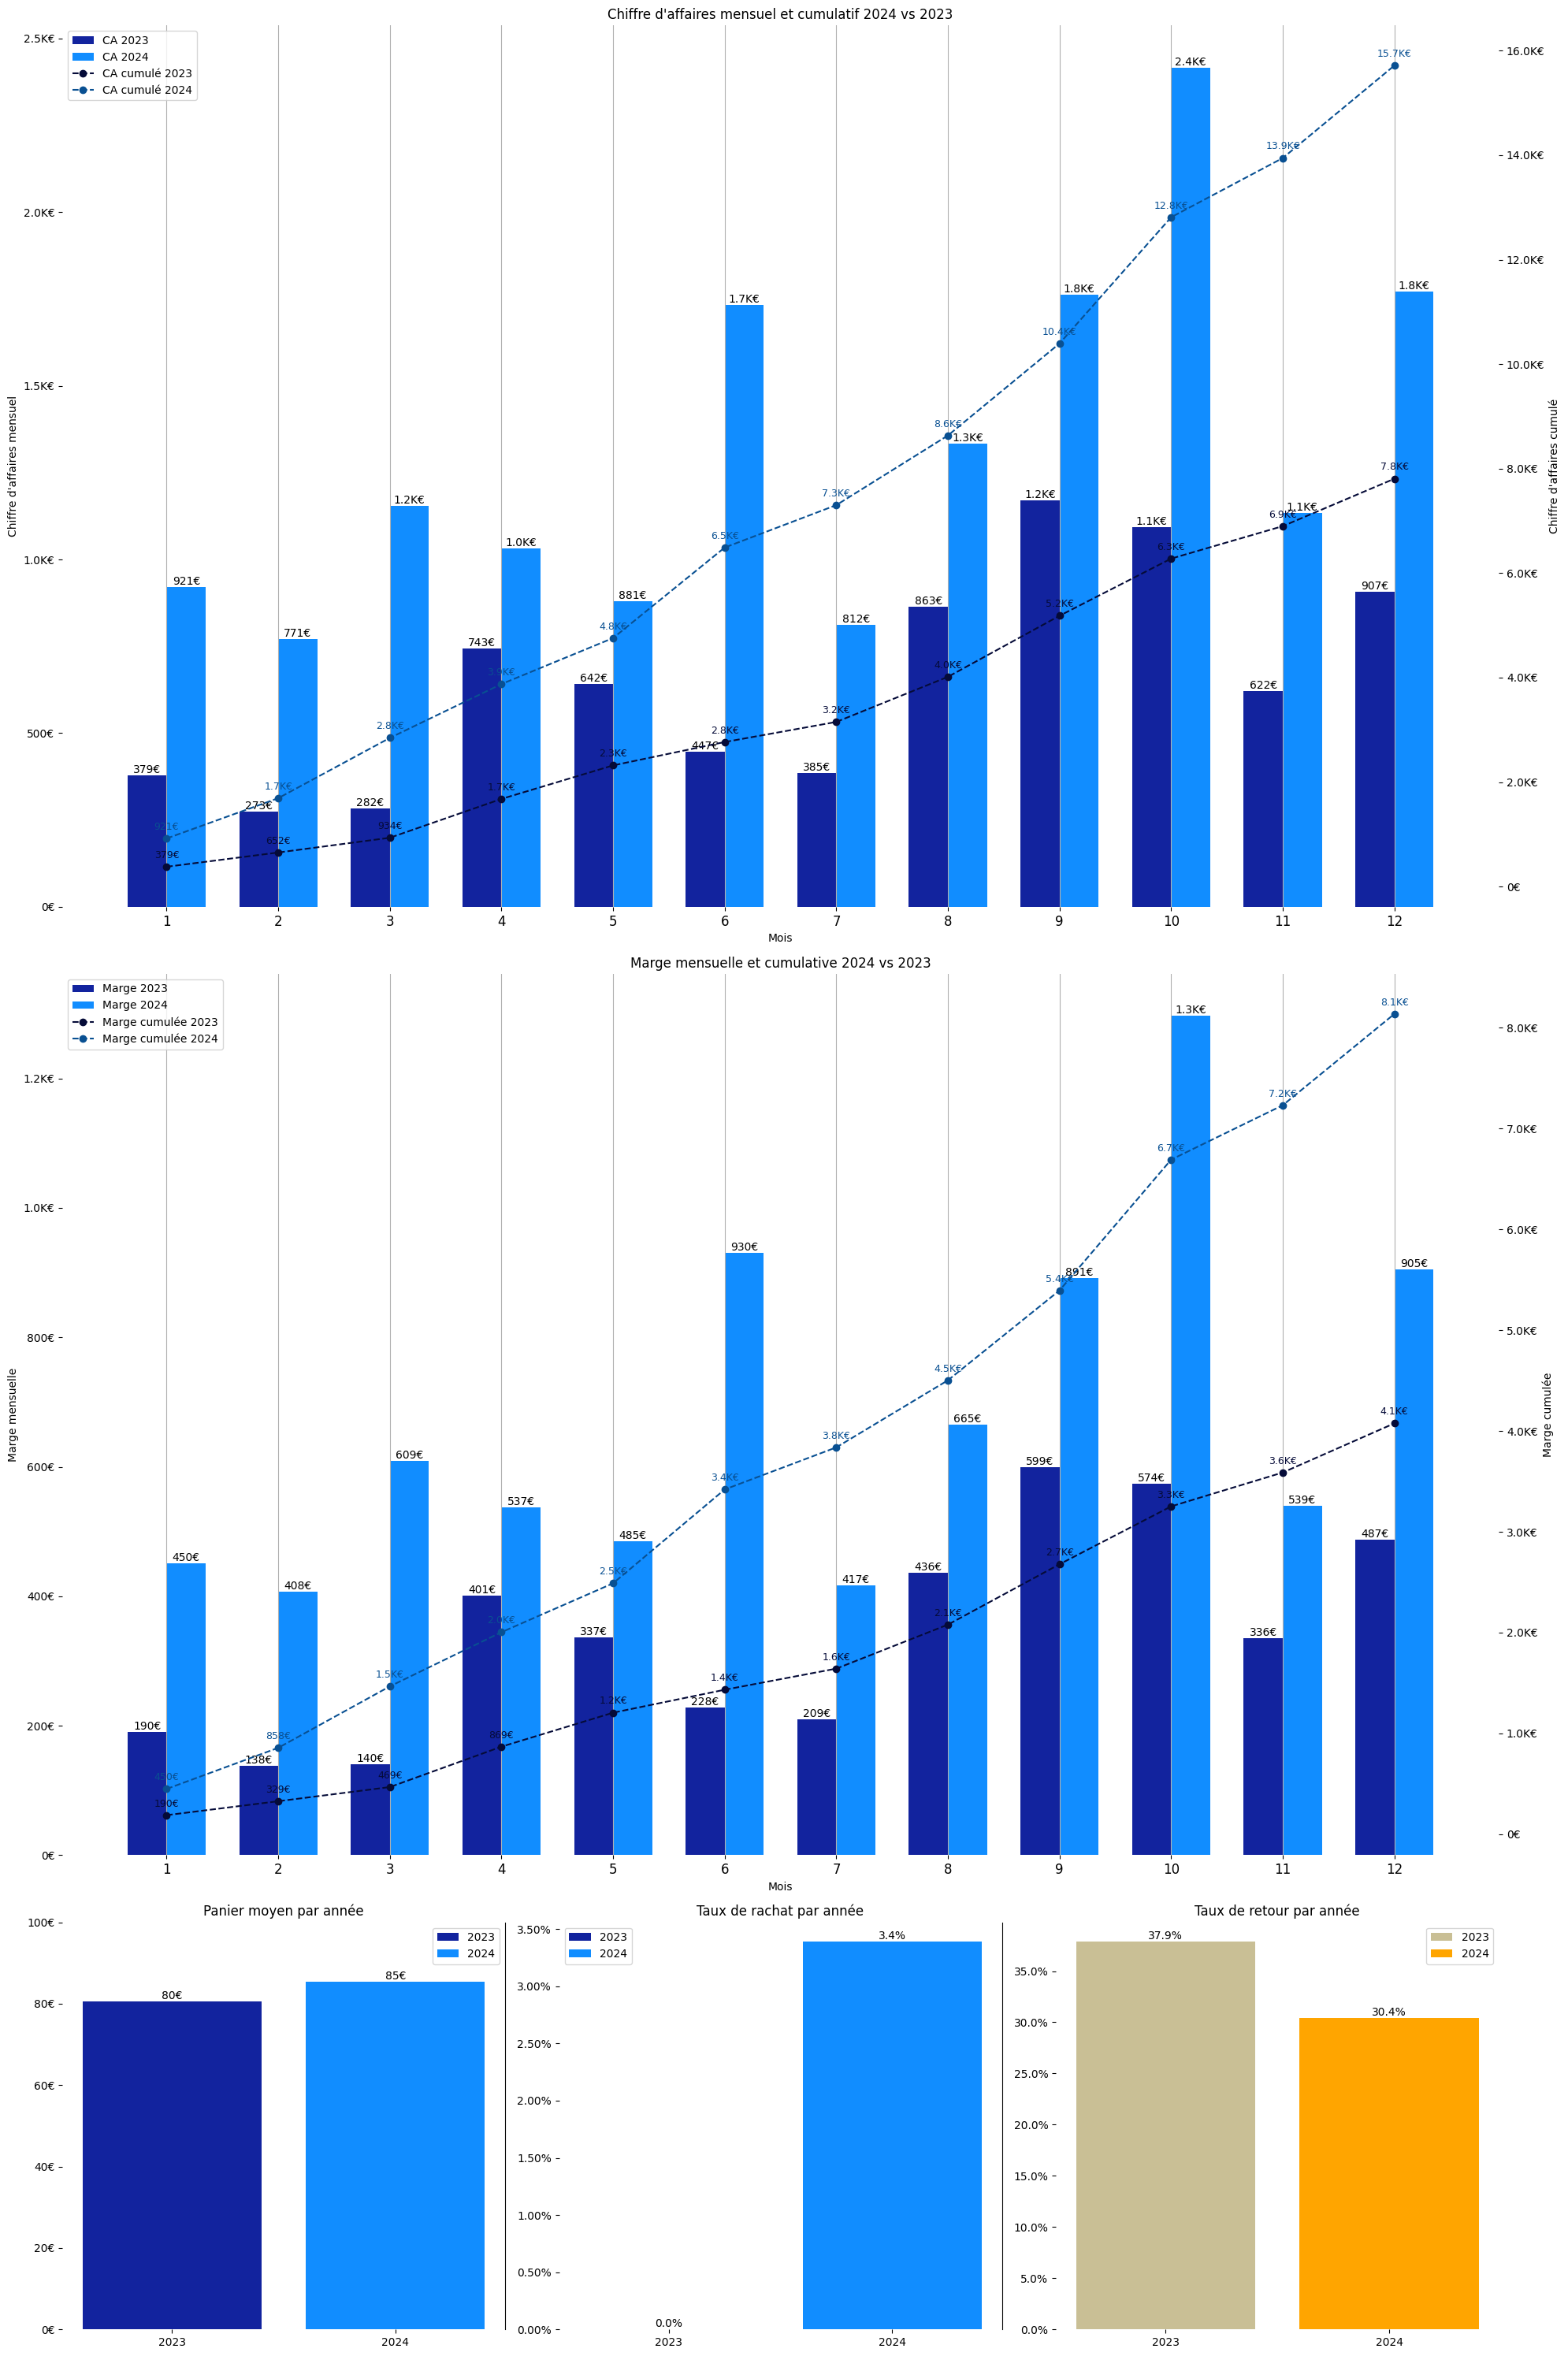

In [26]:
# CREATION DE LA PAGE OVERVIEW :

#Configuration de la page 
fig = plt.figure(constrained_layout=False, figsize = (20,30))
gs = fig.add_gridspec(5, 3)
ax1=fig.add_subplot(gs[0:2, :])
ax2=fig.add_subplot(gs[2:4, :])
ax3=fig.add_subplot(gs[4, 0])
ax4=fig.add_subplot(gs[4, 1])
ax5=fig.add_subplot(gs[4, 2])

#PPREMIER GRAPHIQUE : CA 2024 VS 2023
CA_month= kpi_CA(df_complete,dimensions=["month_created","year_created"])

# Trier les mois correctement

CA_month = CA_month.sort_values(["month_created","year_created"])

#séparer les années
df_CA_2023= CA_month[CA_month["year_created"]==2023].copy()
df_CA_2024= CA_month[CA_month["year_created"]==2024].copy()

#calcul du YTD
df_CA_2023['CA_YTD'] = df_CA_2023['chiffre_affaires'].cumsum()
df_CA_2024['CA_YTD'] = df_CA_2024['chiffre_affaires'].cumsum()

#creation du graphique 
x= np.arange(len(df_CA_2023["month_created"]))
largeur = 0.35

# Barres
barres_2023_CA = ax1.bar(x - largeur/2, df_CA_2023["chiffre_affaires"], width=largeur, label="CA 2023", color='#12239E')
barres_2024_CA = ax1.bar(x + largeur/2, df_CA_2024["chiffre_affaires"], width=largeur, label="CA 2024", color='#118DFF')
ax1.set_xlabel("Mois")
ax1.set_ylabel("Chiffre d'affaires mensuel")
ax1.yaxis.set_major_formatter(currency) # on applique la fonction currency pour avoir le bon format de l'axe y
ax1.set_xticks(x)
ax1.set_xticklabels(df_CA_2023["month_created"].astype(str))
ax1.bar_label(barres_2023_CA, labels=[currency(v, None) for v in df_CA_2023["chiffre_affaires"]])
ax1.bar_label(barres_2024_CA, labels=[currency(v,None) for v in df_CA_2024["chiffre_affaires"]])

# Courbes cumulées (axe secondaire)
ax1_cum = ax1.twinx()
ax1_cum.plot(x, df_CA_2023["CA_YTD"], color="#050B38", marker="o", linestyle="--", label="CA cumulé 2023")
ax1_cum.plot(x, df_CA_2024["CA_YTD"], color="#095092", marker="o", linestyle="--", label="CA cumulé 2024")
ax1_cum.set_ylabel("Chiffre d'affaires cumulé")
ax1_cum.yaxis.set_major_formatter(currency) # on applique la fonction currency pour avoir le bon format de l'axe y
for i, v in enumerate(df_CA_2023["CA_YTD"]):
    ax1_cum.annotate(
        currency(v, None),
        (x[i], v),
        textcoords="offset points",
        xytext=(0, 8),
        ha="center",
        fontsize=9,
        color="#050B38"
    )

for i, v in enumerate(df_CA_2024["CA_YTD"]):
    ax1_cum.annotate(
        currency(v, None),
        (x[i], v),
        textcoords="offset points",
        xytext=(0, 8),
        ha="center",
        fontsize=9,
        color="#095092"
    )


# Légende combinée
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_cum.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
ax1.set_title("Chiffre d'affaires mensuel et cumulatif 2024 vs 2023")


#Formattage du graphique 
ax1.grid(visible=True, which='major', axis='x')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1_cum.spines['top'].set_visible(False)
ax1_cum.spines['right'].set_visible(False)
ax1_cum.spines['bottom'].set_visible(False)
ax1_cum.spines['left'].set_visible(False)


# SECONDE GRAPHIQUE : MARGE 2024 VS 2023

Margin_month= kpi_Margin(df_complete,dimensions=["month_created","year_created"])

# Trier les mois correctement
Margin_month = Margin_month.sort_values(["month_created","year_created"])

#séparer les années
df_Margin_2023= Margin_month[Margin_month["year_created"]==2023].copy()
df_Margin_2024= Margin_month[Margin_month["year_created"]==2024].copy()

#calcul du YTD
df_Margin_2023['MARGIN_YTD'] = df_Margin_2023['marge'].cumsum()
df_Margin_2024['MARGIN_YTD'] = df_Margin_2024['marge'].cumsum()

#creation du graphique 
x2= np.arange(len(df_Margin_2023["month_created"]))
largeur2 = 0.35

# Barres
barres_2023_M = ax2.bar(x2 - largeur2/2, df_Margin_2023["marge"], width=largeur2, label="Marge 2023", color='#12239E')
barres_2024_M = ax2.bar(x2 + largeur2/2, df_Margin_2024["marge"], width=largeur2, label="Marge 2024", color='#118DFF')
ax2.set_xlabel("Mois")
ax2.set_ylabel("Marge mensuelle")
ax2.set_xticks(x)
ax2.set_xticklabels(df_Margin_2023["month_created"].astype(str))
ax2.yaxis.set_major_formatter(currency) # on applique la fonction currency pour avoir le bon format de l'axe y
ax2.bar_label(barres_2023_M, labels=[currency(v, None) for v in df_Margin_2023["marge"]])
ax2.bar_label(barres_2024_M, labels=[currency(v,None) for v in df_Margin_2024["marge"]])

# Courbes cumulées (axe secondaire)
ax2_cum = ax2.twinx()
ax2_cum.plot(x, df_Margin_2023["MARGIN_YTD"], color="#050B38", marker="o", linestyle="--", label="Marge cumulée 2023")
ax2_cum.plot(x, df_Margin_2024["MARGIN_YTD"], color="#095092", marker="o", linestyle="--", label="Marge cumulée 2024")
ax2_cum.set_ylabel("Marge cumulée")
ax2_cum.yaxis.set_major_formatter(currency) # on applique la fonction currency pour avoir le bon format de l'axe y
for i, v in enumerate(df_Margin_2023["MARGIN_YTD"]):
    ax2_cum.annotate(
        currency(v, None),
        (x[i], v),
        textcoords="offset points",
        xytext=(0, 8),
        ha="center",
        fontsize=9,
        color="#050B38"
    )

for i, v in enumerate(df_Margin_2024["MARGIN_YTD"]):
    ax2_cum.annotate(
        currency(v, None),
        (x[i], v),
        textcoords="offset points",
        xytext=(0, 8),
        ha="center",
        fontsize=9,
        color="#095092"
    )

# Légende combinée
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_cum.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
ax2.set_title("Marge mensuelle et cumulative 2024 vs 2023")

#Formattage du graphique 
ax2.grid(visible=True, which='major', axis='x')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='x', which='major', labelsize=12)
ax2_cum.spines['top'].set_visible(False)
ax2_cum.spines['right'].set_visible(False)
ax2_cum.spines['bottom'].set_visible(False)
ax2_cum.spines['left'].set_visible(False)


# TROISIEME GRAPHIQUE : PANIER MOYEN 2024 VS 2023

PM_year=kpi_panier_moyen(df_complete,dimensions=["year_created"])
#séparer les années
PM_2023= PM_year[PM_year["year_created"]==2023].copy()
PM_2024= PM_year[PM_year["year_created"]==2024].copy()


# Barres

barres_2023_PM =ax3.bar(PM_2023["year_created"],PM_2023["panier_moyen"],color="#12239E",label="2023")
barres_2024_PM =ax3.bar(PM_2024["year_created"],PM_2024["panier_moyen"],color='#118DFF',label="2024")

# Mise en forme
ax3.set_xticks([2023, 2024]) #on force des entiers (sinon dans la légende on a 2022.75, 2023.25, etc)
ax3.set_xticklabels(["2023", "2024"])#on force des entiers (sinon dans la légende on a 2022.75, 2023.25, etc)
ax3.set_title("Panier moyen par année")
ax3.yaxis.set_major_formatter(currency) # on applique la fonction currency pour avoir le bon format de l'axe 
ax3.set_ylim(0, 100) # force les limites de l'axe 
ax3.legend()
ax3.bar_label(barres_2023_PM, labels=[currency(v, None) for v in PM_2023["panier_moyen"]])
ax3.bar_label(barres_2024_PM, labels=[currency(v,None) for v in PM_2024["panier_moyen"]])

ax3.spines['top'].set_visible(False)
#ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

# QUATRIEME GRAPHIQUE : TAUX RACHAT 2024 VS 2023

#séparer les années
TREA_2023 = kpi_tx_reachat(df_complete, 2023)
TREA_2024 = kpi_tx_reachat(df_complete, 2024)

x = [0, 1]
values = [TREA_2023, TREA_2024]

barres_2023_TREA = ax4.bar(x[0], values[0], color='#12239E', label="2023")
barres_2024_TREA = ax4.bar(x[1], values[1], color='#118DFF', label="2024")

# ticks cohérents avec x
ax4.set_xticks(x)
ax4.set_xticklabels(["2023", "2024"])

ax4.set_title("Taux de rachat par année")
ax4.legend()

ax4.spines['top'].set_visible(False)
#ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) # permet d'avoir l'axe des y en %
ax4.bar_label(barres_2023_TREA, labels=[f"{v:.1%}" for v in values[:1]])
ax4.bar_label(barres_2024_TREA, labels=[f"{v:.1%}" for v in values[1:]])



#CINQUIEME GRAPHIQUE : TAUX RETOUR 2024 VS 2023
TR_year=kpi_tx_retour(df,dimensions=["year_created"]) # on utilise df et pas df_complete puisqu'on a besoin des statuts Returned
#séparer les années
TR_2023= TR_year[TR_year["year_created"]==2023].copy()
TR_2024= TR_year[TR_year["year_created"]==2024].copy()

# Barres

barres_2023_TR = ax5.bar(TR_2023["year_created"],TR_2023["taux_retour"],color="#c9bf95",label="2023")
barres_2024_TR = ax5.bar(TR_2024["year_created"],TR_2024["taux_retour"],color="orange",label="2024")

# Mise en forme
ax5.set_xticks([2023, 2024]) #on force des entiers (sinon dans la légende on a 2022.75, 2023.25, etc)
ax5.set_xticklabels(["2023", "2024"])#on force des entiers (sinon dans la légende on a 2022.75, 2023.25, etc)
ax5.set_title("Taux de retour par année")
ax5.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) # permet d'avoir l'axe des y en %

ax5.legend()

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.bar_label(barres_2023_TR, labels=[f"{v:.1%}" for v in TR_2023["taux_retour"]])
ax5.bar_label(barres_2024_TR, labels=[f"{v:.1%}" for v in TR_2024["taux_retour"]])

plt.tight_layout() #ajuste automatiquement les marges


### VUE PAR CATEGORIE

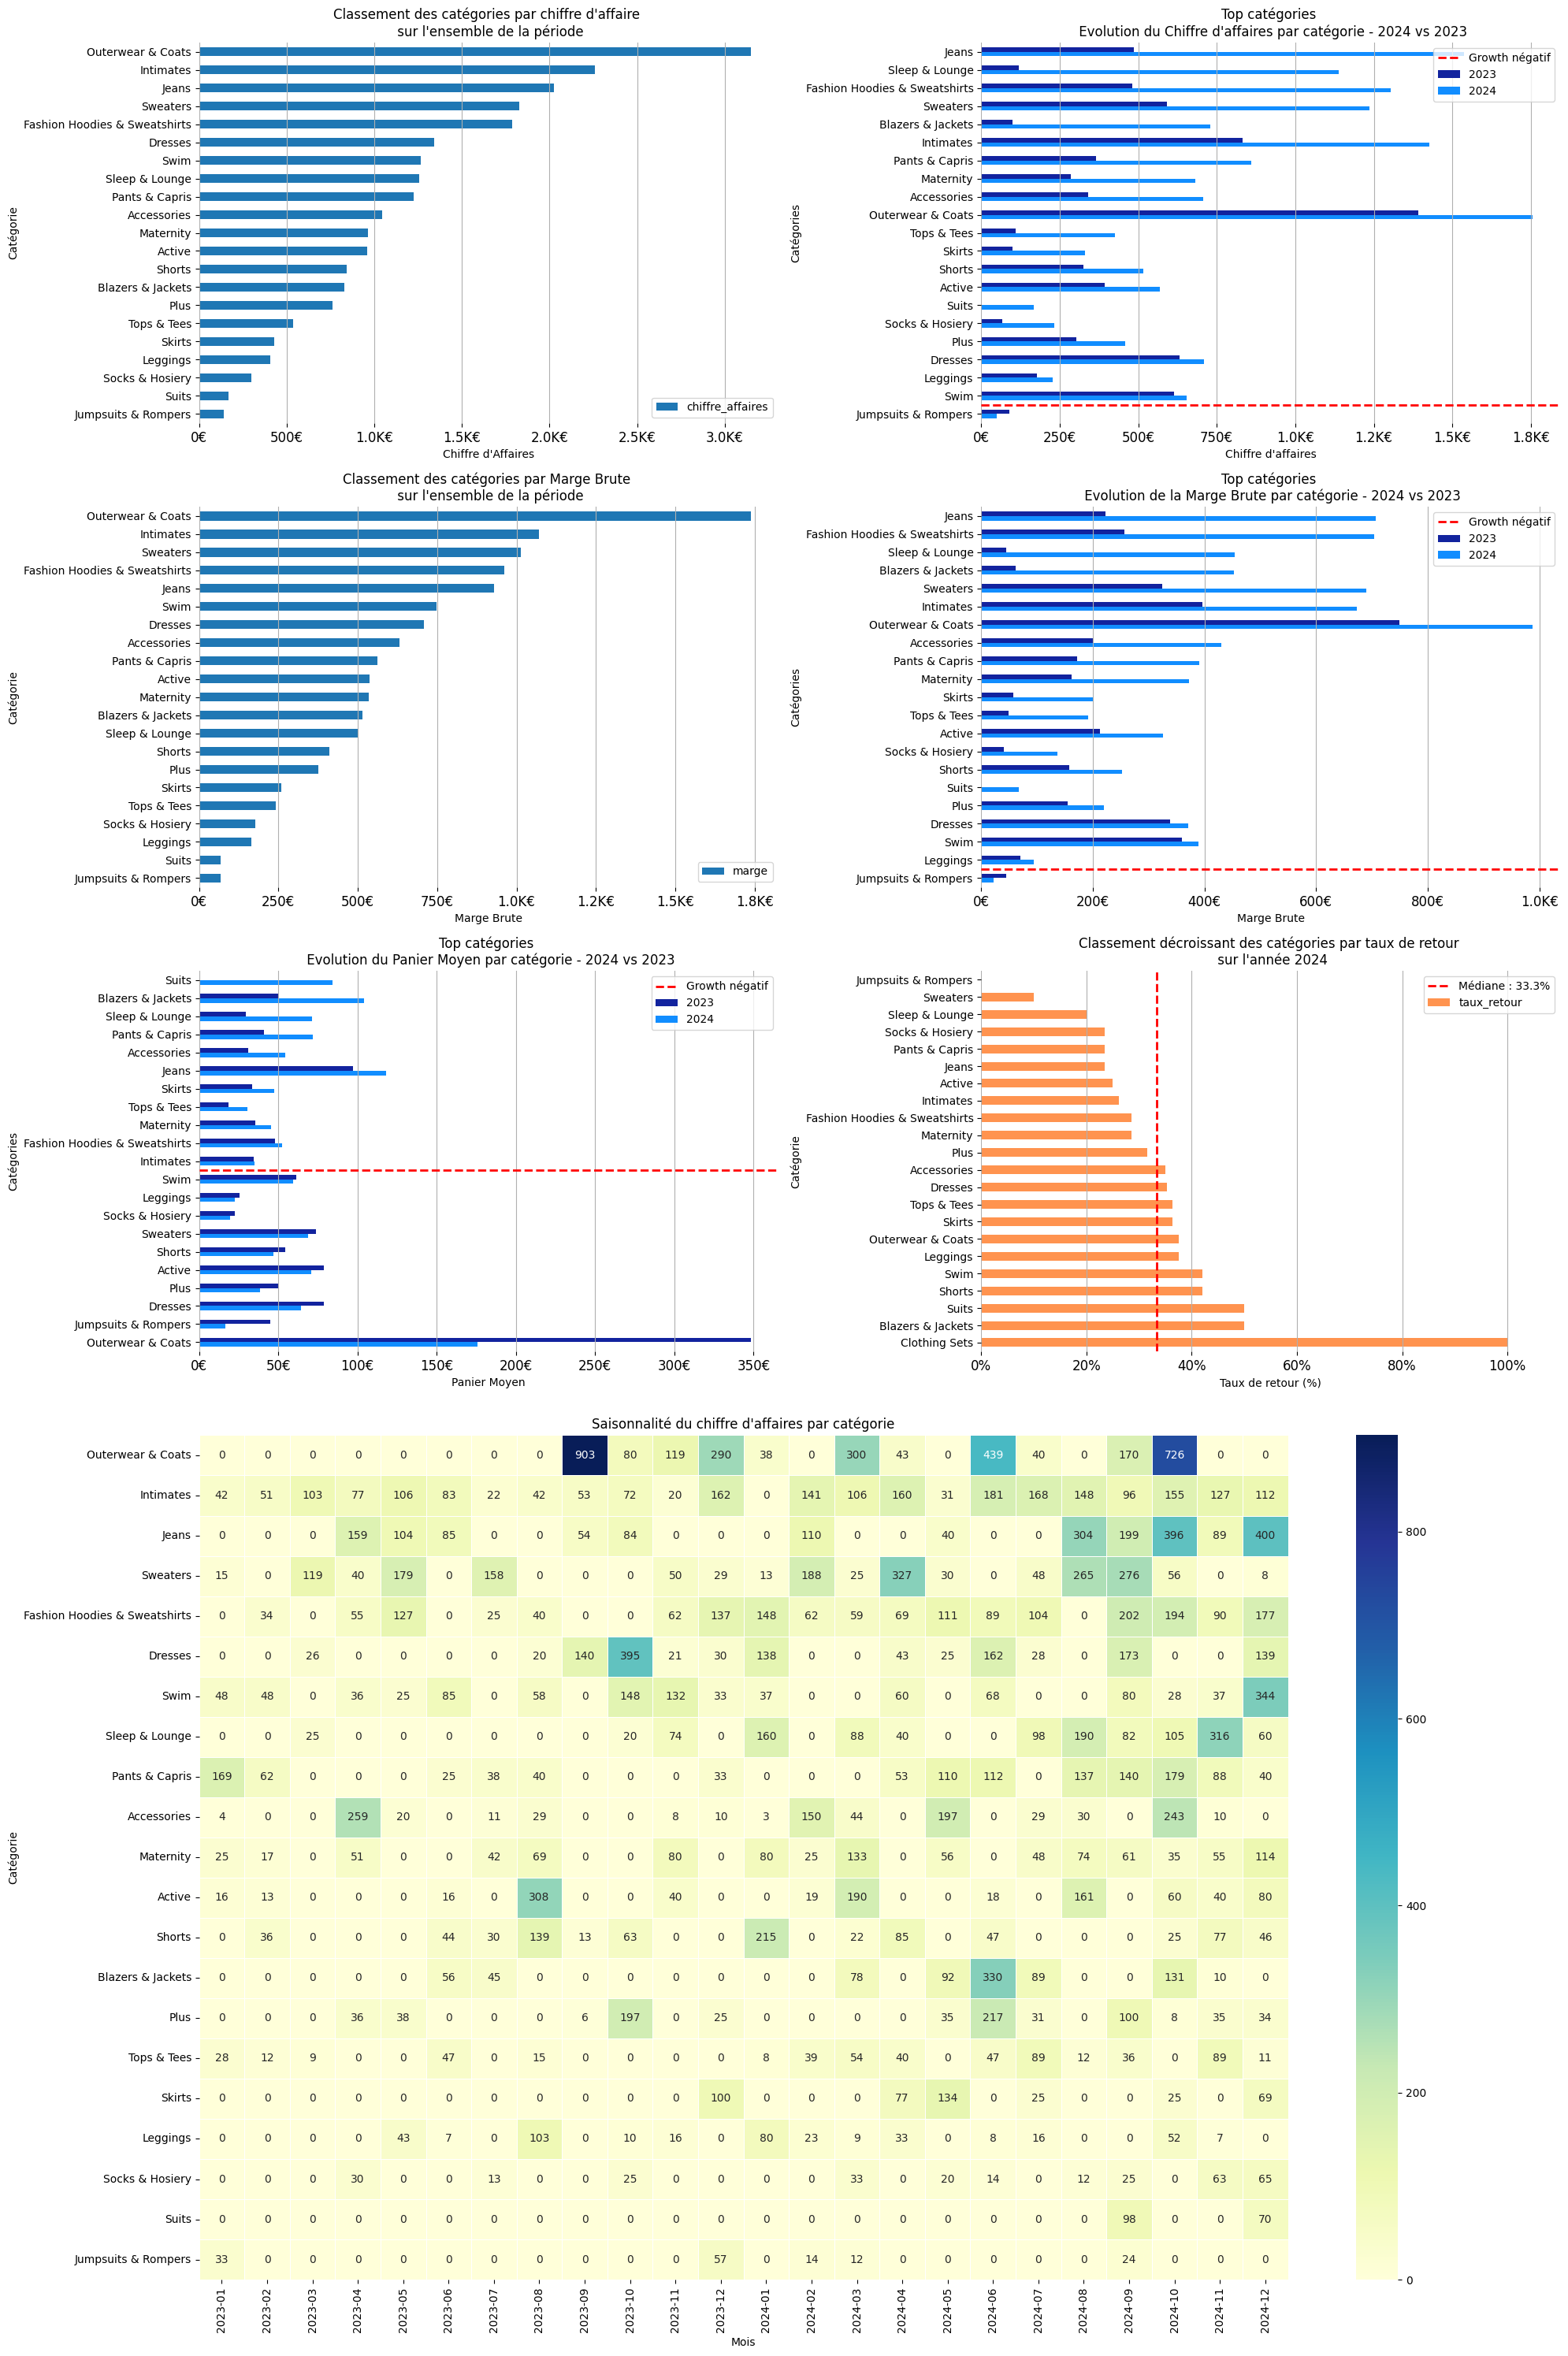

In [27]:
#CREATION DES VISUELS PAR CATEGORIE

fig = plt.figure(constrained_layout=False, figsize = (20,30))
gs = fig.add_gridspec(5, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1,1])

ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2,1])

ax7=fig.add_subplot(gs[3:,0:])


#Première ligne : indicateurs du Chiffre d'Affaires
#ax1 = Top CA 
top_CA_category=kpi_CA(df_complete, ['category'])
top_CA_category = top_CA_category.sort_values(by='chiffre_affaires', ascending=True) #classement des catégories par CA
top_CA_category = top_CA_category.set_index('category') # category devient l'index
top_CA_category.plot(kind='barh',  ax=ax1)
ax1.set_title("Classement des catégories par chiffre d'affaire \n sur l'ensemble de la période")
ax1.set_xlabel("Chiffre d'Affaires")
ax1.set_ylabel("Catégorie")
ax1.xaxis.set_major_formatter(currency) # on applique la fonction currency pour avoir le bon format de l'axe x

#Formattage du graphique 
ax1.grid(visible=True, which='major', axis='x')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.xaxis.set_major_formatter(currency)
ax1.tick_params(axis='x', which='major', labelsize=12)


#ax2= Growth CA
# Création du pivot des chiffres d'affaires sur df_complete (order "Complete" + exclusion de 2025), on passe en pivot et on traite les éventuelles valeurs N/A (même s'il n'y en a pas a priori)
topCA_cat_year_pivot = (kpi_CA(df_complete, ['category', "year_created"]).pivot(index='category', columns='year_created', values='chiffre_affaires').fillna(0))

#Calcul de la croissance 2024 vs 2023
growthCA = topCA_cat_year_pivot[2024] - topCA_cat_year_pivot[2023]

# Tri décroissant par growth
topCA_cat_year_pivot_sorted = topCA_cat_year_pivot.loc[growthCA.sort_values(ascending=False).index]

#Tracer le bar histogramme
colors2 = ['#12239E', '#118DFF']
chart2=topCA_cat_year_pivot_sorted.plot(kind='barh', color=colors2, ax=ax2)

# on trace la ligne rouge qui délimite le growth négatif
negative_growth_CA = growthCA.sort_values(ascending=False) # trie le growth en décroissant
if (negative_growth_CA < 0).any(): # crée une série booléenne indiquant quelles catégories ont une croissance négative, renvoie True si au moisn une est négative
    first_negative_cat = negative_growth_CA[negative_growth_CA < 0].index[0]  # prend la première catégorie dans la série triée qui a une croissance négative.
    y_position = topCA_cat_year_pivot_sorted.index.get_loc(first_negative_cat) - 0.5 # -0.5 car décale la ligne de 0,5 pour qu’elle soit entre les barres et pas par-dessus
    ax2.axhline(y=y_position, color='red', linestyle='--', linewidth=2, label='Growth négatif') # trace la ligne

# Labels et titre
ax2.set_title("Top catégories \n Evolution du Chiffre d'affaires par catégorie - 2024 vs 2023")
ax2.set_xlabel("Chiffre d'affaires")
ax2.set_ylabel("Catégories")
ax2.invert_yaxis()  # catégorie la plus haute en haut
ax2.legend(title=None) 
ax2.xaxis.set_major_formatter(currency)

#Formattage du graphique 
ax2.grid(visible=True, which='major', axis='x')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.xaxis.set_major_formatter(currency)
ax2.tick_params(axis='x', which='major', labelsize=12)



#ax3 = Top Marge
topM_category=kpi_Margin(df_complete, ['category'])
topM_category = topM_category.sort_values(by='marge', ascending=True)
topM_category = topM_category.set_index('category')
topM_category.plot(kind='barh',  ax=ax3)
ax3.set_title("Classement des catégories par Marge Brute \n sur l'ensemble de la période")
ax3.set_xlabel("Marge Brute")
ax3.set_ylabel("Catégorie")
ax3.xaxis.set_major_formatter(currency)

#Formattage du graphique 
ax3.grid(visible=True, which='major', axis='x')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.xaxis.set_major_formatter(currency)
ax3.tick_params(axis='x', which='major', labelsize=12)


#ax4= Growth Marge
# Création du pivot de la Marge Brute sur df_complete, on passe en pivot et on traite les éventuelles valeurs N/A (même s'il n'y en a pas a priori)
topM_cat_year_pivot = (kpi_Margin(df_complete, ['category', "year_created"]).pivot(index='category', columns='year_created', values='marge').fillna(0))

#Calcul de la croissance 2024 vs 2023
growthM = topM_cat_year_pivot[2024] - topM_cat_year_pivot[2023]

# Tri décroissant par growth 
topM_cat_year_pivot_sorted = topM_cat_year_pivot.loc[growthM.sort_values(ascending=False).index]

#Tracer le bar histogramme
colors4 = ['#12239E', '#118DFF']
chart4=topM_cat_year_pivot_sorted.plot(kind='barh', color=colors4, ax=ax4)

# on trace la ligne rouge qui délimite le growth négatif
negative_growth_M = growthM.sort_values(ascending=False) # trie le growth en décroissant
if (negative_growth_M < 0).any(): # crée une série booléenne indiquant quelles catégories ont une croissance négative, renvoie True si au moisn une est négative
    first_negative_cat = negative_growth_M[negative_growth_M < 0].index[0]  # prend la première catégorie dans la série triée qui a une croissance négative.
    y_position = topM_cat_year_pivot_sorted.index.get_loc(first_negative_cat) - 0.5 # -0.5 car décale la ligne de 0,5 pour qu’elle soit entre les barres et pas par-dessus
    ax4.axhline(y=y_position, color='red', linestyle='--', linewidth=2, label='Growth négatif') # trace la ligne

# Labels et titre
ax4.set_title("Top catégories \n Evolution de la Marge Brute par catégorie - 2024 vs 2023")
ax4.set_xlabel("Marge Brute")
ax4.set_ylabel("Catégories")
ax4.invert_yaxis()  # catégorie la plus haute en haut
ax4.legend(title=None) 
ax4.xaxis.set_major_formatter(currency)

#Formattage du graphique 
ax4.grid(visible=True, which='major', axis='x')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.xaxis.set_major_formatter(currency)
ax4.tick_params(axis='x', which='major', labelsize=12)



#ax5= Panier Moyen
# Création du pivot du Panier Moyen sur df_complete, on passe en pivot et on traite les éventuelles valeurs N/A (même s'il n'y en a pas a priori)
topPM_cat_year_pivot = (kpi_panier_moyen(df_complete, ['category', "year_created"]).pivot(index='category', columns='year_created', values='panier_moyen').fillna(0))

#Calcul de la croissance 2024 vs 2023
growthPM = topPM_cat_year_pivot[2024] - topPM_cat_year_pivot[2023]

# Tri décroissant par growth 
topPM_cat_year_pivot_sorted = topPM_cat_year_pivot.loc[growthPM.sort_values(ascending=False).index]

#Tracer le bar histogramme
colors4 = ['#12239E', '#118DFF']
chart4=topPM_cat_year_pivot_sorted.plot(kind='barh', color=colors4, ax=ax5)

# on trace la ligne rouge qui délimite le growth négatif
negative_growth_PM = growthPM.sort_values(ascending=False) # trie le growth en décroissant
if (negative_growth_PM < 0).any(): # crée une série booléenne indiquant quelles catégories ont une croissance négative, renvoie True si au moisn une est négative
    first_negative_cat = negative_growth_PM[negative_growth_PM < 0].index[0]  # prend la première catégorie dans la série triée qui a une croissance négative.
    y_position = topPM_cat_year_pivot_sorted.index.get_loc(first_negative_cat) - 0.5 # -0.5 car décale la ligne de 0,5 pour qu’elle soit entre les barres et pas par-dessus
    ax5.axhline(y=y_position, color='red', linestyle='--', linewidth=2, label='Growth négatif') # trace la ligne

# Labels et titre
ax5.set_title("Top catégories \n Evolution du Panier Moyen par catégorie - 2024 vs 2023")
ax5.set_xlabel("Panier Moyen")
ax5.set_ylabel("Catégories")
ax5.invert_yaxis()  # catégorie la plus haute en haut
ax5.legend(title=None) 
ax5.xaxis.set_major_formatter(currency)

#Formattage du graphique 
ax5.grid(visible=True, which='major', axis='x')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.xaxis.set_major_formatter(currency)
ax5.tick_params(axis='x', which='major', labelsize=12)



#ax6 = Top Taux de retour --> cette fois on applique la fonction sur df et non sur df_complete puisque nécessaire pour le calcul du taux de retour sur 2024
top_TR_category=kpi_tx_retour(df[df["year_created"]==2024], ['category'])

top_TR_category = top_TR_category.sort_values(by='taux_retour', ascending=False)
top_TR_category = top_TR_category.set_index('category')
top_TR_category.plot(kind='barh', color="#FF934F", ax=ax6)
ax6.set_xlim(0, top_TR_category['taux_retour'].max() * 1.1)

#ajout d'une barre pour montrer la valeur mediane du taux de retour:
median_TR = top_TR_category['taux_retour'].median()
ax6.axvline(x=median_TR, color='red', linestyle='--', linewidth=2, label=f"Médiane : {median_TR*100:.1f}%")  # affichée en %

ax6.set_title("Classement décroissant des catégories par taux de retour \n sur l'année 2024")
ax6.set_xlabel("Taux de retour (%)")
ax6.set_ylabel("Catégorie")

#Formattage du graphique 
ax6.grid(visible=True, which='major', axis='x')
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.tick_params(axis='x', which='major', labelsize=12)
ax6.legend(title=None)
ax6.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) # permet d'avoir l'axe des x en %



#ax7 : Heatmap -> saisonalité du chiffre d'affaire par mois, catégories triées par CA décroissant
ca_month_category = kpi_CA(df_complete,['year_month', 'category'])
pivot_heatmap = ca_month_category.pivot(index='category', columns='year_month', values='chiffre_affaires').fillna(0)
total_ca = pivot_heatmap.sum(axis=1)
pivot_heatmap_sorted = pivot_heatmap.loc[total_ca.sort_values(ascending=False).index]

sns.heatmap(pivot_heatmap_sorted, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f", ax=ax7)
ax7.set_title("Saisonnalité du chiffre d'affaires par catégorie")
ax7.set_xlabel("Mois")
ax7.set_ylabel("Catégorie")

#Formattage du graphique 

ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['bottom'].set_visible(False)
ax7.spines['left'].set_visible(False)


plt.tight_layout() #ajuste automatiquement les marges


### VUES PAR REGION

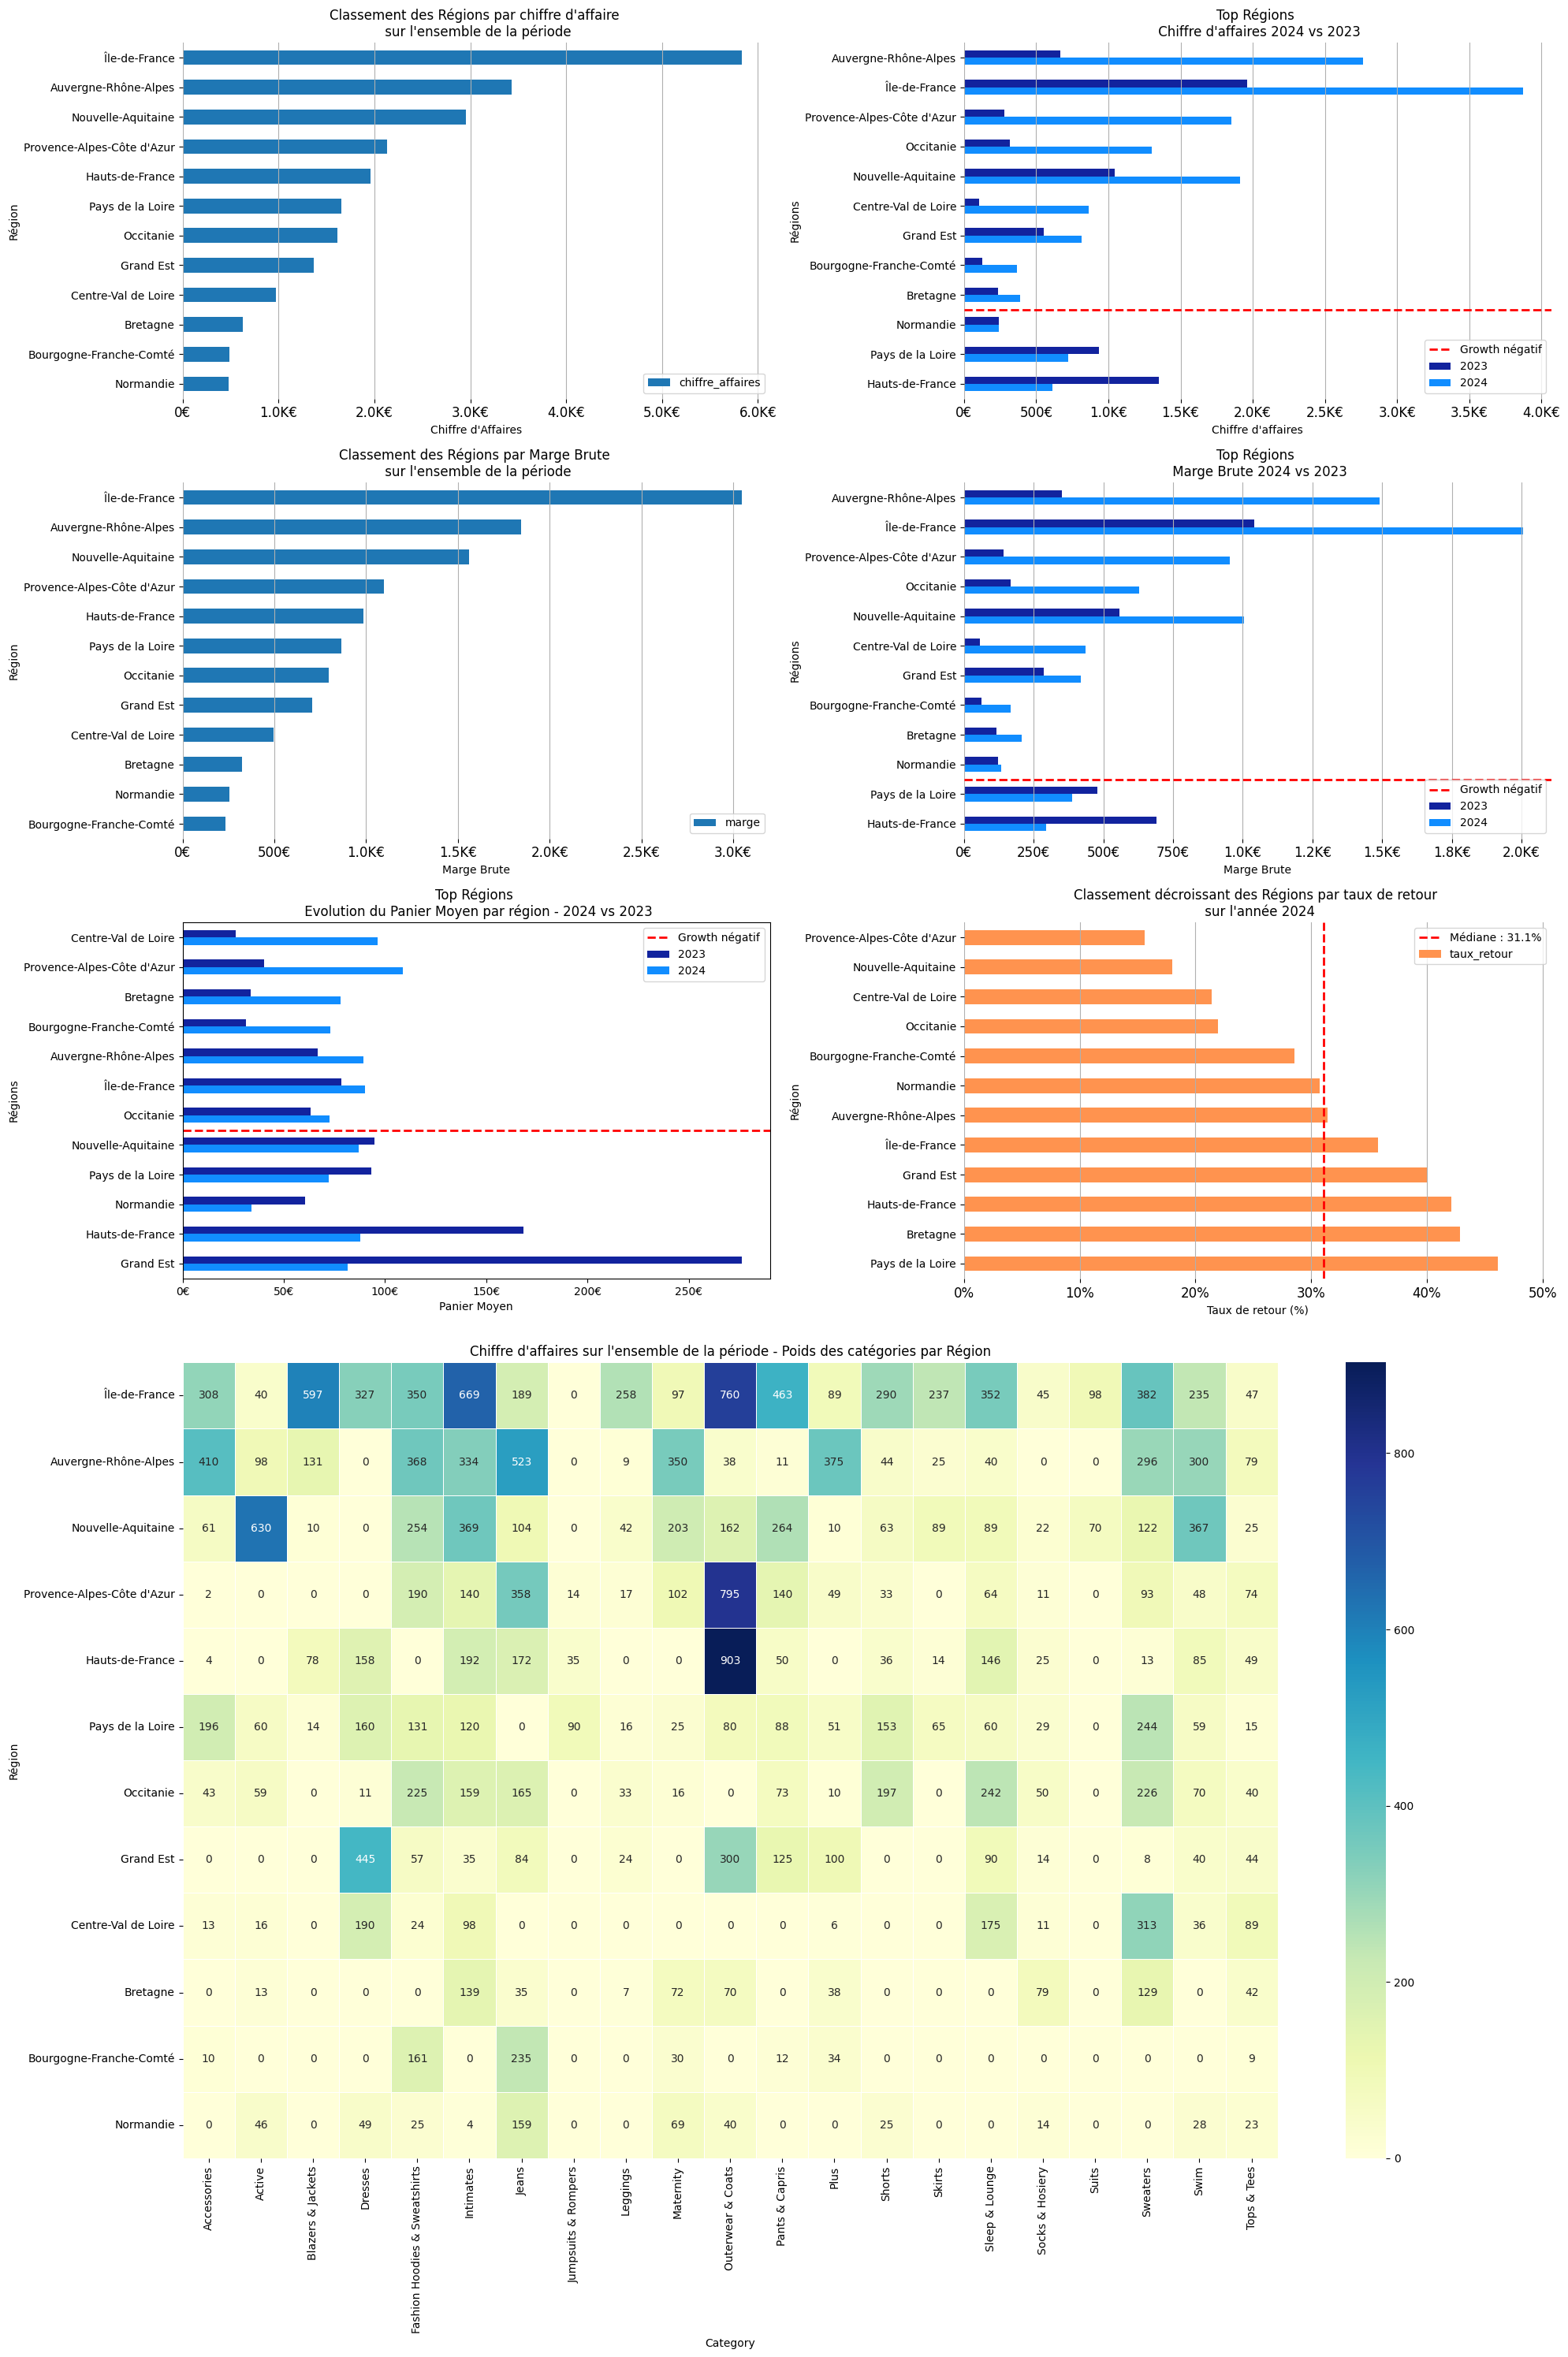

In [28]:
#CREATION DES VISUELS PAR REGION

fig = plt.figure(constrained_layout=False, figsize = (20,30))
gs = fig.add_gridspec(5, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1,1])

ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2,1])

ax7=fig.add_subplot(gs[3:,0:])

#Première ligne : indicateurs du Chiffre d'Affaires
#ax1 = Top CA par state (Région)
top_CA_State=kpi_CA(df_complete, ['state']) 
top_CA_State = top_CA_State.sort_values(by='chiffre_affaires', ascending=True) #classement des Régions par CA
top_CA_State = top_CA_State.set_index('state') # State devient l'index
top_CA_State.plot(kind='barh', ax=ax1)
ax1.set_title("Classement des Régions par chiffre d'affaire \n sur l'ensemble de la période")
ax1.set_xlabel("Chiffre d'Affaires")
ax1.set_ylabel("Région")
ax1.xaxis.set_major_formatter(currency) # on applique la fonction currency pour avoir le bon format de l'axe x

#Formattage du graphique 
ax1.grid(visible=True, which='major', axis='x')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.xaxis.set_major_formatter(currency)
ax1.tick_params(axis='x', which='major', labelsize=12)

#ax2= Growth CA
# Création du pivot des chiffres d'affaires sur df_complete (order "Complete" + exclusion de 2025), on passe en pivot et on traite les éventuelles valeurs N/A (même s'il n'y en a pas a priori)
topCA_state_year_pivot = (kpi_CA(df_complete, ['state', "year_created"]).pivot(index='state', columns='year_created', values='chiffre_affaires').fillna(0))

#Calcul de la croissance 2024 vs 2023
growthCA = topCA_state_year_pivot[2024] - topCA_state_year_pivot[2023]

# Tri décroissant par growth 
topCA_state_year_pivot_sorted = topCA_state_year_pivot.loc[growthCA.sort_values(ascending=False).index]

#Tracer le bar histogramme
colors2 = ['#12239E', '#118DFF']
chart2=topCA_state_year_pivot_sorted.plot(kind='barh', color=colors2, ax=ax2)

# on trace la ligne rouge qui délimite le growth négatif
negative_growth_CA = growthCA.sort_values(ascending=False) # trie le growth en décroissant
if (negative_growth_CA < 0).any(): # crée une série booléenne indiquant quelles Régions ont une croissance négative, renvoie True si au moisn une est négative
    first_negative_state = negative_growth_CA[negative_growth_CA < 0].index[0]  # prend la première Région dans la série triée qui a une croissance négative.
    y_position = topCA_state_year_pivot_sorted.index.get_loc(first_negative_state) - 0.5 # -0.5 car décale la ligne de 0,5 pour qu’elle soit entre les barres et pas par-dessus
    ax2.axhline(y=y_position, color='red', linestyle='--', linewidth=2, label='Growth négatif') # trace la ligne

# Labels et titre
ax2.set_title("Top Régions \n Chiffre d'affaires 2024 vs 2023")
ax2.set_xlabel("Chiffre d'affaires")
ax2.set_ylabel("Régions")
ax2.invert_yaxis()  # Région la plus haute en haut
ax2.legend(title=None) 
ax2.xaxis.set_major_formatter(currency)

#Formattage du graphique 
ax2.grid(visible=True, which='major', axis='x')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.xaxis.set_major_formatter(currency)
ax2.tick_params(axis='x', which='major', labelsize=12)


#ax3 = Top Marge
topM_State=kpi_Margin(df_complete, ['state'])
topM_State = topM_State.sort_values(by='marge', ascending=True)
topM_State = topM_State.set_index('state')
topM_State.plot(kind='barh',  ax=ax3)
ax3.set_title("Classement des Régions par Marge Brute \n sur l'ensemble de la période")
ax3.set_xlabel("Marge Brute")
ax3.set_ylabel("Région")
ax3.xaxis.set_major_formatter(currency)

#Formattage du graphique 
ax3.grid(visible=True, which='major', axis='x')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.xaxis.set_major_formatter(currency)
ax3.tick_params(axis='x', which='major', labelsize=12)

#ax4= Growth CA
# Création du pivot de la Marge Brute sur df_complete (order "Complete" + exclusion de 2025), on passe en pivot et on traite les éventuelles valeurs N/A (même s'il n'y en a pas a priori)
topM_state_year_pivot = (kpi_Margin(df_complete, ['state', "year_created"]).pivot(index='state', columns='year_created', values='marge').fillna(0))

#Calcul de la croissance 2024 vs 2023
growthM = topM_state_year_pivot[2024] - topM_state_year_pivot[2023]

# Tri décroissant par growth
topM_state_year_pivot_sorted = topM_state_year_pivot.loc[growthM.sort_values(ascending=False).index]

#Tracer le bar histogramme
colors4 = ['#12239E', '#118DFF']
chart4=topM_state_year_pivot_sorted.plot(kind='barh', color=colors4, ax=ax4)

# on trace la ligne rouge qui délimite le growth négatif
negative_growth_M = growthM.sort_values(ascending=False) # trie le growth en décroissant
if (negative_growth_M < 0).any(): # crée une série booléenne indiquant quelles Régions ont une croissance négative, renvoie True si au moisn une est négative
    first_negative_state = negative_growth_M[negative_growth_M < 0].index[0]  # prend la première Région dans la série triée qui a une croissance négative.
    y_position = topM_state_year_pivot_sorted.index.get_loc(first_negative_state) - 0.5 # -0.5 car décale la ligne de 0,5 pour qu’elle soit entre les barres et pas par-dessus
    ax4.axhline(y=y_position, color='red', linestyle='--', linewidth=2, label='Growth négatif') # trace la ligne

# Labels et titre
ax4.set_title("Top Régions \n Marge Brute 2024 vs 2023")
ax4.set_xlabel("Marge Brute")
ax4.set_ylabel("Régions")
ax4.invert_yaxis()  # Région la plus haute en haut
ax4.legend(title=None) 
ax4.xaxis.set_major_formatter(currency)

#Formattage du graphique 
ax4.grid(visible=True, which='major', axis='x')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.xaxis.set_major_formatter(currency)
ax4.tick_params(axis='x', which='major', labelsize=12)


#ax5= Panier Moyen
# Création du pivot du Panier Moyen sur df_complete, on passe en pivot et on traite les éventuelles valeurs N/A (même s'il n'y en a pas a priori)
topPM_State = (kpi_panier_moyen(df_complete, ['state', "year_created"]).pivot(index='state', columns='year_created', values='panier_moyen').fillna(0))

#Calcul de la croissance 2024 vs 2023
growthPM = topPM_State[2024] - topPM_State[2023]

# Tri décroissant par growth 
topPM_State_pivot_sorted = topPM_State.loc[growthPM.sort_values(ascending=False).index]

#Tracer le bar histogramme
colors4 = ['#12239E', '#118DFF']
chart4=topPM_State_pivot_sorted.plot(kind='barh', color=colors4, ax=ax5)

# on trace la ligne rouge qui délimite le growth négatif
negative_growth_PM = growthPM.sort_values(ascending=False) # trie le growth en décroissant
if (negative_growth_PM < 0).any(): # crée une série booléenne indiquant quelles Régions ont une croissance négative, renvoie True si au moisn une est négative
    first_negative_state = negative_growth_PM[negative_growth_PM < 0].index[0]  # prend la première Région dans la série triée qui a une croissance négative.
    y_position = topPM_State_pivot_sorted.index.get_loc(first_negative_state) - 0.5 # -0.5 car décale la ligne de 0,5 pour qu’elle soit entre les barres et pas par-dessus
    ax5.axhline(y=y_position, color='red', linestyle='--', linewidth=2, label='Growth négatif') # trace la ligne

# Labels et titre
ax5.set_title("Top Régions \n Evolution du Panier Moyen par région - 2024 vs 2023")
ax5.set_xlabel("Panier Moyen")
ax5.set_ylabel("Régions")
ax5.invert_yaxis()  # Région la plus haute en haut
ax5.legend(title=None) 
ax5.xaxis.set_major_formatter(currency)



#ax6 = Top Taux de retour --> cette fois on applique la fonction sur df et non sur df_complete puisque nécessaire pour le calcul du taux de retour
top_TR_State=kpi_tx_retour(df[df["year_created"]==2024], ['state'])
top_TR_State = top_TR_State.sort_values(by='taux_retour', ascending=False)
top_TR_State = top_TR_State.set_index('state')
top_TR_State.plot(kind='barh', color="#FF934F", ax=ax6)
ax6.set_xlim(0, top_TR_State['taux_retour'].max() * 1.1)

#ajout d'une barre pour montrer la valeur mediane du taux de retour:
median_TR = top_TR_State['taux_retour'].median()
ax6.axvline(x=median_TR, color='red', linestyle='--', linewidth=2, label=f"Médiane : {median_TR*100:.1f}%")  # affichée en %

ax6.set_title("Classement décroissant des Régions par taux de retour \n sur l'année 2024")
ax6.set_xlabel("Taux de retour (%)")
ax6.set_ylabel("Région")

#Formattage du graphique 
ax6.grid(visible=True, which='major', axis='x')
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.tick_params(axis='x', which='major', labelsize=12)
ax6.legend(title=None)
ax6.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) # permet d'avoir l'axe des x en %

#ax7 : Poids des category par region
ca_month_State = kpi_CA(df_complete,['category', 'state'])
pivot_heatmap = ca_month_State.pivot(index='state', columns='category', values='chiffre_affaires').fillna(0)
total_ca = pivot_heatmap.sum(axis=1)
pivot_heatmap_sorted = pivot_heatmap.loc[total_ca.sort_values(ascending=False).index]

sns.heatmap(pivot_heatmap_sorted, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f", ax=ax7)
ax7.set_title("Chiffre d'affaires sur l'ensemble de la période - Poids des catégories par Région")
ax7.set_xlabel("Category")
ax7.set_ylabel("Région")

#Formattage du graphique 

ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['bottom'].set_visible(False)
ax7.spines['left'].set_visible(False)

plt.tight_layout() #ajuste automatiquement les marges






#### ZOOM SUR LES VILLES

C:\Users\chd78002\AppData\Local\Temp\ipykernel_23608\3215589287.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['city_type'] = df_complete['city'].apply(lambda x: 'Nouvelles villes' if x in new_cities else 'Villes déjà ciblées')


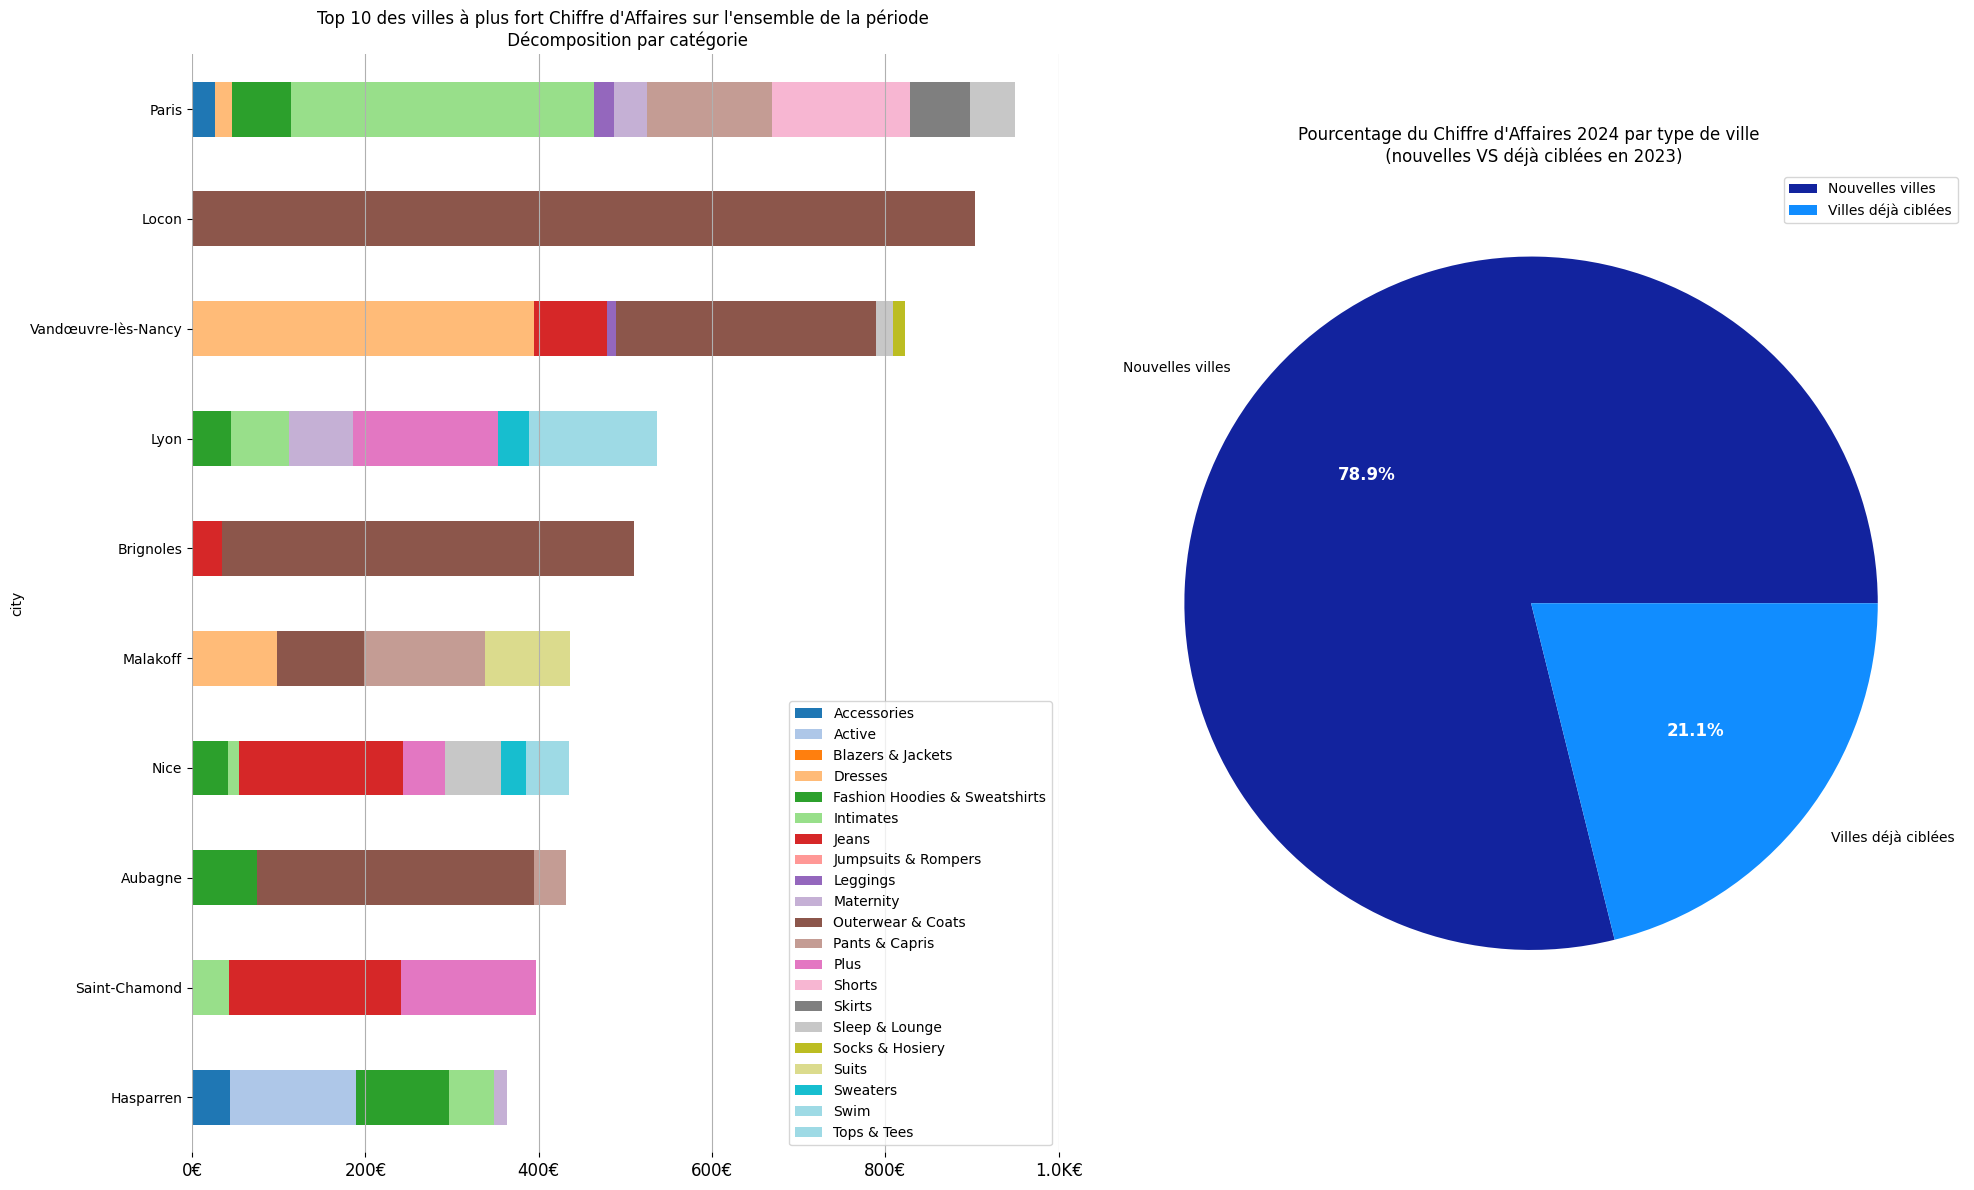

In [29]:
fig = plt.figure(constrained_layout=False, figsize = (20,12))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Premier Graphique : Top des villes par CA avec décomposition par catégorie
# CA par ville + catégorie
top_CA_City_cat = kpi_CA(df_complete, ['city', 'category'])
# Pivot : catégories en colonnes
top_CA_City_cat = (top_CA_City_cat.pivot(index='city', columns='category', values='chiffre_affaires').fillna(0))
# CA total
top_CA_City_cat["CA_total"] = top_CA_City_cat.sum(axis=1)
# TOP 10 décroissant
top_city = (top_CA_City_cat.sort_values("CA_total", ascending=False).head(10))
# classement en ordre croissant du top 10 pour le graphique
top_city = top_city.sort_values("CA_total", ascending=True)
# supprimer CA_total sans casser l'ordre -> obligé pour avoir el graphique correctement affché
top_city = top_city.drop(columns="CA_total")

# Graphique
n_cat = len(top_city.columns)
colors = cm.tab20(np.linspace(0, 1, n_cat)) #création d'une palette de couleurs distinctes pour chaque category
top_city.plot(kind='barh', stacked=True, ax=ax1,color=colors)

#format du graphique 

ax1.grid(visible=True, which='major', axis='x')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xlim(0, 1000) # force les limites de l'axe x
ax1.xaxis.set_major_formatter(currency)
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.legend(title=None)
ax1.set_title("Top 10 des villes à plus fort Chiffre d'Affaires sur l'ensemble de la période \n Décomposition par catégorie")


#Second graphique : Proportion du CA sur les nouvelles villes

#Définissons la liste des nouvelles villes (CA en 2024 mais pas en 2023)
cities_2024 = df_complete[df_complete['year_created'] == 2024]['city'].unique()
cities_2023 = df_complete[df_complete['year_created'] == 2023]['city'].unique()
new_cities = list(set(cities_2024) - set(cities_2023))  # nouvelles villes

#On calcule le CA selon nouvelles villes et villes pour lesquelles on avait déjà du CA en 2023
df_complete['city_type'] = df_complete['city'].apply(lambda x: 'Nouvelles villes' if x in new_cities else 'Villes déjà ciblées')
#on ne garde que 2024 :
df_2024 = df_complete[df_complete['year_created'] == 2024]

# CA total par type

CA_by_city_type = kpi_CA(df_2024, dimensions=['city_type'])

#graphique :
wedges, texts, autotexts = ax2.pie(
    CA_by_city_type["chiffre_affaires"],
    labels=CA_by_city_type['city_type'],
    autopct='%1.1f%%',
    colors=['#12239E', '#118DFF']
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
ax2.set_title("Pourcentage du Chiffre d'Affaires 2024 par type de ville \n (nouvelles VS déjà ciblées en 2023)")
ax2.legend(title=None)

plt.tight_layout() #ajuste automatiquement les marges



### VUES PAR BRAND

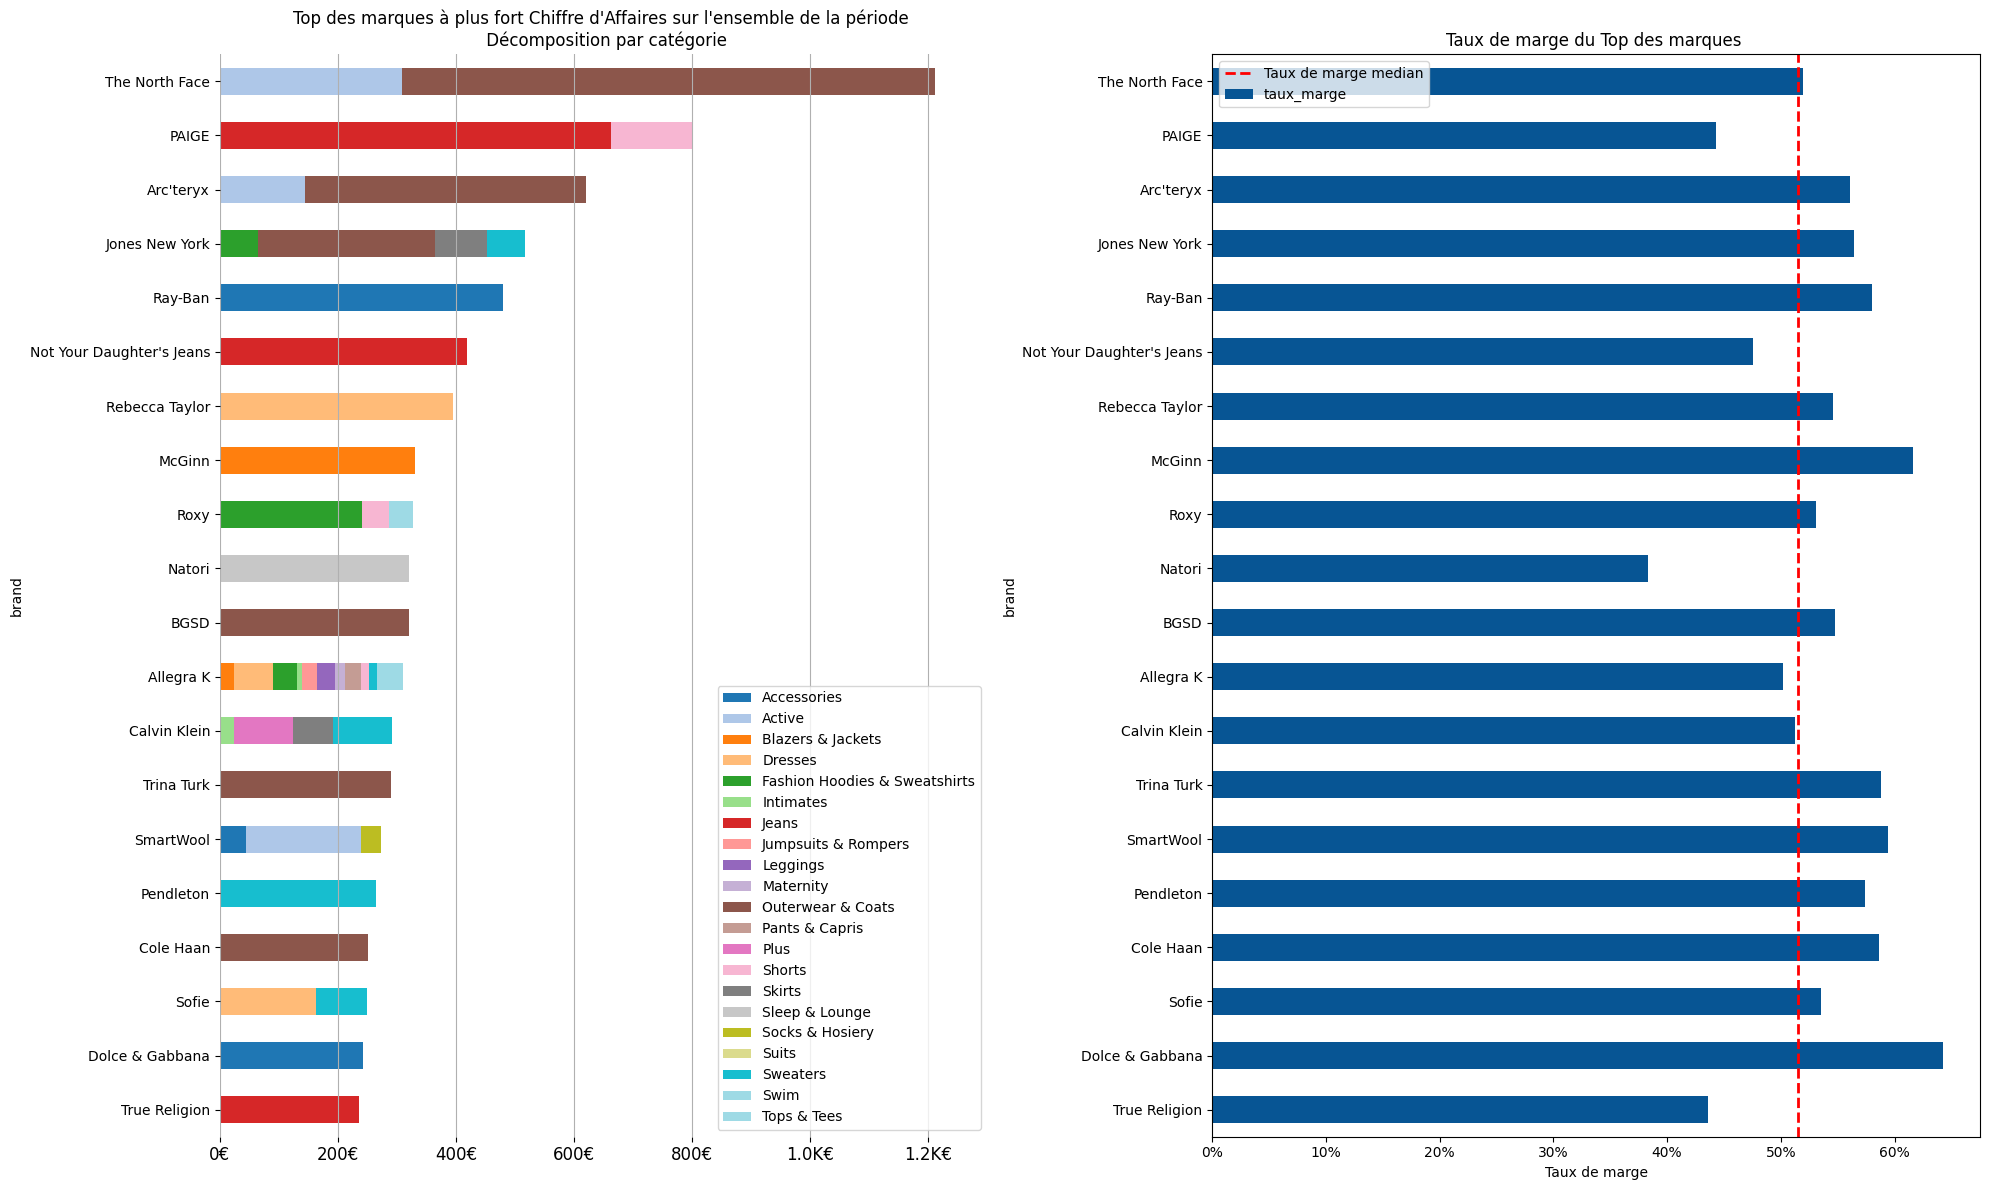

In [30]:
fig = plt.figure(constrained_layout=False, figsize = (20,12))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# CA par brand + catégorie
top_CA_Brand_cat = kpi_CA(df_complete, ['brand', 'category'])
# Pivot : catégories en colonnes
top_CA_Brand_cat = (top_CA_Brand_cat.pivot(index='brand', columns='category', values='chiffre_affaires').fillna(0))
# CA total
top_CA_Brand_cat["CA_total"] = top_CA_Brand_cat.sum(axis=1)
# TOP décroissant
top_brand = (top_CA_Brand_cat.sort_values("CA_total", ascending=False).head(20))
# classement en ordre croissant du top 10 pour le graphique
top_brand = top_brand.sort_values("CA_total", ascending=True)
# supprimer CA_total sans casser l'ordre -> obligé pour avoir el graphique correctement affché
top_brand = top_brand.drop(columns="CA_total")

# Graphique
n_cat = len(top_brand.columns)
colors = cm.tab20(np.linspace(0, 1, n_cat)) #création d'une palette de couleurs distinctes pour chaque category
top_brand.plot(kind='barh', stacked=True, ax=ax1,color=colors)
ax1.legend(title="Catégorie")
ax1.set_title("Top des marques à plus fort Chiffre d'Affaires sur l'ensemble de la période \n Décomposition par catégorie")

#format du grpahique 

ax1.grid(visible=True, which='major', axis='x')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xlim(0, 1300) # force les limites de l'axe x
ax1.xaxis.set_major_formatter(currency)
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.legend(title=None)


#second graphique : Top Brand par taux de marge (marge / Chiffre d'affaires). on veut garder les mêmes brands que dans le premier graphique

#on récupère les brands qui nous intéresse (définies dans premier graphique):
brand_order = top_brand.index.tolist()

#on calcule d'abord marge et CA individuellement
CA_brand = kpi_CA(df_complete, ['brand'])
margin_brand = kpi_Margin(df_complete, ['brand'])
#On fusionne les 2
df_brand = CA_brand.merge(margin_brand, on='brand')


#calcul du taux de marge :
df_brand['taux_marge'] = df_brand['marge'] / df_brand['chiffre_affaires']
df_brand = df_brand[df_brand['chiffre_affaires'] > 0] #sécurité si on a un CA <0 ou =0


#on fait un ranking sur le taux_marge puis on garde le top10
top_margin_brand = (df_brand.set_index('brand').loc[brand_order][['taux_marge']])


#graphique top 
top_margin_brand.plot(kind='barh',ax=ax2,color='#075594',legend=False)

#on ajoute la moyenne du taux de marge 
taux_marge_median = df_brand['taux_marge'].median()

ax2.axvline(x=taux_marge_median,color='red',linestyle='--',linewidth=2,label='Taux de marge median')

ax2.set_title("Taux de marge du Top des marques ")
ax2.set_xlabel("Taux de marge")
ax2.xaxis.set_major_formatter(lambda x, _: f"{x:.0%}")
ax2.legend(title=None)




plt.tight_layout() #ajuste automatiquement les marges

#### ANALYSE DES GRAPHIQUES & STORY TELLING 2023-2024

##### L’analyse de 2024 vs 2023 montre une croissance du chiffre d’affaires et de la marge très positive, avec un chiffre d’affaires qui passe de 7.8K€ à 15.7K€ et une marge qui passe de 4.1K€ à 8.1K€ entre 2023 et 2024.
##### La mensualité du CA et de la marge sont corrélées (courbes similaires pour le CA & la Marge).
##### Le Panier Moyen montre aussi une évolution positive, en passant de 80€ à 85€ par commande entre 2023 et 2024, tandis que le taux de retour a diminué de 7.5% (30.4% en 2024 vs 37.9% en 2023).
##### D’autre part, on observe une fidélisation de la clientèle avec un taux de réachat de 3.4% en 2024, alors qu’aucun réachat n’avait été observé en 2023.

##### Principaux drivers et points d’attention  
##### Le classement des catégories et régions confirment l’alignement CA et Marge, ce qui laisse à penser que le taux de marge est relativement homogène par catégorie / région.
##### La catégorie avec les meilleurs CA & Marge est Outerwear & Coats (près de 3.2K€ CA/ 1.7K€ Marge cumulés sur 2023-2024), qui montre également une croissance significative (CA passant de 1.4K€ à 1.8K€ & Marge passant de 0.7k€ à 1.0k€).
##### La catégorie Jeans enregistre la plus forte croissance (en pourcentage) à la fois en CA et Marge (CA & Marge passant respectivement de 0.5k€ à 1.5k€ et de 0.2k€ à 0.7k€)
##### Attention à  Jumpsuits & Rompers qui est la seule catégorie affichant un recul en 2024 vs 2023 en Marge et CA.
##### En ce qui concerne l’évolution du panier moyen par catégorie, 11 catégories sur 21 affichent une augmentation du panier moyen en 2024 vs 2023, tandis que 10 sur 21 montrent une baisse du panier moyen (à noter en particulier Outerwear & Coats qui voit son panier moyen diminuer drastiquement, de 348€ en 2023 à 175€ en 2024.)
##### Attention également à la catégorie Clothing Sets pour laquelle le taux de retour est de 100% et qui nécessite probablement une investigation.
##### A l’exception de Outerwear & Coats pour laquelle on observe une saisonnalité sur Septembre/Octobre (top des ventes sur 2023 et 2024), aucune tendance de saisonnalité claire n’a pu être dégagée des autres catégories.
#####
##### D’un point de vue géographique, l’Ile de France a le meilleur CA & Marge cumulés sur 2023-2024, devant Auvergne-Rhone-Alpes. 
##### C’est cependant cette seconde région qui montre la plus forte croisse en 2024 vs 2023 sur le CA et la marge, qui passent respectivement de 0.7k€ à 2.8k€ et de 0.4k€ à 1.5k€.
##### Attention aux régions Pays de la Loire et Hauts de France qui affichent des reculs en Marge & Chiffre d’affaires entre 2023 et 2024, et à la Normandie tout juste stable en CA tandis que sa Marge diminue en 2024 vs 2023.
##### Concernant le Panier Moyen, 5 catégories sur 12 affichent une diminution en 2024 vs 2023 – en particulier le Grand Est et les Hauts de France, qui passent respectivement de 276€ à 81€ et de 169€ à 87€.
#####
##### L’analyse du Chiffre d’affaires par région et par catégorie sur l’ensemble de la période (2023-2024) permet en outre de mettre en évidence que :
##### -	Le CA de l’Ile de France repose sur une multitude de catégories (13 catégories supérieures à  200€)
##### -	Les Hauts de France doivent leur CA principalement à Outerwears & Coats, tout comme la région Provence-Alpes-Côté-d’Azur 
##### -	Le CA de Outerwears est réparti pour la très grande partie entre 4 régions :  les Hauts de France, l’Ile de France, PACA, et le Grand Est
##### -	La catégorie Active est très largement drivée par la Nouvelle Aquitaine. 
##### -	Trois Régions sont très largement contributrices da CA de Swim : Nouvelle-Aquitaine, Auvergne-Rhone-Alpes, Ile-de-France
##### Concernant les villes, on notera que 78.9% du CA 2024 provient de nouvelles villes (ie pas de CA en 2023).
##### En ce qui concerne les marques, The North Face montre le meilleur CA sur l’ensemble de la période 2023-2024. Cependant, c’est Dolce Gabbana (n°19) qui a le meilleur taux de marge (64%).

